# 0. Read ntuples as panda

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot3 
from pandas_profiling import ProfileReport

In [19]:
l1 = np.arange(0,1000, 100)
l2 = np.arange(100,1100, 100)

list(zip(l1, l2))

[(0, 100),
 (100, 200),
 (200, 300),
 (300, 400),
 (400, 500),
 (500, 600),
 (600, 700),
 (700, 800),
 (800, 900),
 (900, 1000)]

In [2]:
%%time
file = uproot3.open("ntuple_PU200_numEvent1000.root")[b'ntuplizer;1'][b'tree;83']
#data = file.pandas.df(["*"], flatten=False, entrystop=20, entrystart=10)   # not the default
data = file.pandas.df(["*"], flatten=True, entrystart=900, entrystop=1000)
data['r'] = np.sqrt(data['x']**2 + data['y']**2)


CPU times: user 9.03 s, sys: 3.24 s, total: 12.3 s
Wall time: 10.4 s


In [59]:
sub

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
900   0           1    12  1106  135249  135249    3326  -2.513352  1.245226   
      1           1    12  1106  135249  135249   10354  -5.358944  2.479808   
      2           1    12  1106  135249  135249   15747  -9.918405  4.102809   
      3           1    12  1106  135249  135249   20339 -13.964993  5.203708   
      4           1    12  1106  135249  135249     953   1.783256  2.105831   
...             ...   ...   ...     ...     ...     ...        ...       ...   
995   1533        1    12  1196  136587  136587   17482  -8.393933 -6.738152   
      1534        1    12  1196  136587  136587    5231  -2.134290 -1.754797   
      1535        1    12  1196  136587  136587   11941  -4.565073 -3.742492   
      1536        1    12  1196  136587  136587   17480  -8.301956 -6.830129   
      1537        1    12  1196  136587  136587   21869 -11.152389 -9.212287   

                        z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                          ...                                  
900   0         -5.111826          548  ...         0    4860     2.535592   
      1         -7.438260          548  ...         0    4861     0.820726   
      2        -11.071568          548  ...         0    4862     3.695462   
      3        -14.208521          548  ...         0    4863     1.815830   
      4         -1.797068          549  ...         0    4831     0.725427   
...                   ...          ...  ...       ...     ...          ...   
995   1533      16.802237         1741  ...         0      54     0.323741   
      1534       9.198039         1742  ...         0      21     0.522535   
      1535      11.879595         1742  ...         0      22     2.815117   
      1536      16.020157         1742  ...         0      23     4.662677   
      1537      19.190977         1742  ...         0      24     0.043305   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
900   0         0.662064 -0.694006  2.657585          2         1          4   
      1         0.662064 -0.694006  2.657585          2         2          3   
      2         0.662064 -0.694006  2.657585          2         3          3   
      3         0.662064 -0.694006  2.657585          2         4          2   
      4         0.442367  0.423518  0.904180          2         1          5   
...                  ...       ...       ...        ...       ...        ...   
995   1533      6.696985  0.829470 -2.458342          2         3          9   
      1534      8.949298  0.773767 -2.461353          2         1          7   
      1535      8.949298  0.773767 -2.461353          2         2          8   
      1536      8.949298  0.773767 -2.461353          2         3          9   
      1537      8.949298  0.773767 -2.461353          2         4          9   

                        r  
entry subentry             
900   0          2.804911  
      1          5.904890  
      2         10.733489  
      3         14.903007  
      4          2.759443  
...                   ...  
995   1533      10.763865  
      1534       2.763061  
      1535       5.903061  
      1536      10.750495  
      1537      14.465199  

[154900 rows x 24 columns]

In [ ]:
len(data.groupby(['particle_id', 'sim_pt']))

In [78]:
sub

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
900   0           1    12  1106  135249  135249    3326  -2.513352  1.245226   
      1           1    12  1106  135249  135249   10354  -5.358944  2.479808   
      2           1    12  1106  135249  135249   15747  -9.918405  4.102809   
      3           1    12  1106  135249  135249   20339 -13.964993  5.203708   
      4           1    12  1106  135249  135249     953   1.783256  2.105831   
...             ...   ...   ...     ...     ...     ...        ...       ...   
995   1533        1    12  1196  136587  136587   17482  -8.393933 -6.738152   
      1534        1    12  1196  136587  136587    5231  -2.134290 -1.754797   
      1535        1    12  1196  136587  136587   11941  -4.565073 -3.742492   
      1536        1    12  1196  136587  136587   17480  -8.301956 -6.830129   
      1537        1    12  1196  136587  136587   21869 -11.152389 -9.212287   

                        z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                          ...                                  
900   0         -5.111826          548  ...         0    4860     2.535592   
      1         -7.438260          548  ...         0    4861     0.820726   
      2        -11.071568          548  ...         0    4862     3.695462   
      3        -14.208521          548  ...         0    4863     1.815830   
      4         -1.797068          549  ...         0    4831     0.725427   
...                   ...          ...  ...       ...     ...          ...   
995   1533      16.802237         1741  ...         0      54     0.323741   
      1534       9.198039         1742  ...         0      21     0.522535   
      1535      11.879595         1742  ...         0      22     2.815117   
      1536      16.020157         1742  ...         0      23     4.662677   
      1537      19.190977         1742  ...         0      24     0.043305   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
900   0         0.662064 -0.694006  2.657585          2         1          4   
      1         0.662064 -0.694006  2.657585          2         2          3   
      2         0.662064 -0.694006  2.657585          2         3          3   
      3         0.662064 -0.694006  2.657585          2         4          2   
      4         0.442367  0.423518  0.904180          2         1          5   
...                  ...       ...       ...        ...       ...        ...   
995   1533      6.696985  0.829470 -2.458342          2         3          9   
      1534      8.949298  0.773767 -2.461353          2         1          7   
      1535      8.949298  0.773767 -2.461353          2         2          8   
      1536      8.949298  0.773767 -2.461353          2         3          9   
      1537      8.949298  0.773767 -2.461353          2         4          9   

                        r  
entry subentry             
900   0          2.804911  
      1          5.904890  
      2         10.733489  
      3         14.903007  
      4          2.759443  
...                   ...  
995   1533      10.763865  
      1534       2.763061  
      1535       5.903061  
      1536      10.750495  
      1537      14.465199  

[154900 rows x 24 columns]

In [72]:
indices = sub.groupby(['particle_id', 'sim_pt']).agg({'x':'count'}).reset_index()

In [73]:
del indices['x']
indices = indices.reset_index().rename(columns = {'index':'sim_id'})
indices['sim_id'] = indices['sim_id'] + 1

In [77]:
t.merge(indices, on = ['particle_id', 'sim_pt'], how = 'right')

run  lumi   evt    nhit   hit_n  hit_id          x          y  \
0         1    12  1198  148258  148258    6512   1.435063  -2.462485   
1         1    12  1198  148258  148258   19449   5.396068  -9.259457   
2         1    12  1198  148258  148258   24376   7.256176 -12.447360   
3         1    12  1198  148258  148258    3262  -2.611179   1.985015   
4         1    12  1198  148258  148258   11371  -5.086059   3.884868   
...     ...   ...   ...     ...     ...     ...        ...        ...   
154895    1    12  1103  142669  142669    3726  -2.441408   1.513727   
154896    1    12  1103  142669  142669    3058  -2.850760   1.745434   
154897    1    12  1103  142669  142669   11026  -5.176624   2.919967   
154898    1    12  1103  142669  142669   16718  -9.650792   4.628028   
154899    1    12  1103  142669  142669   21641 -13.813763   5.635900   

                z  particle_id  ...  sim_type  sim_dxy_sig      sim_pt  \
0      -10.790451          122  ...         0     1.904429  131.464462   
1      -11.918266          122  ...         0     2.873497  131.464462   
2      -12.438866          122  ...         0     3.643420  131.464462   
3        2.307506          129  ...         0    16.471935    6.981437   
4       14.364957          129  ...         0     0.160131    6.981437   
...           ...          ...  ...       ...          ...         ...   
154895   1.086250         3122  ...         0     0.743350    0.400093   
154896   1.046204         3122  ...         0     1.868296    0.400093   
154897   0.825950         3122  ...         0     0.799367    0.400093   
154898   0.435501         3122  ...         0    13.402409    0.400093   
154899   0.085098         3122  ...         0     7.629270    0.400093   

         sim_eta   sim_phi  volume_id  layer_id  module_id          r  sim_id  
0      -0.142285 -1.043710          2         1          3   2.850130       1  
1      -0.142285 -1.043710          2         3          2  10.717047       1  
2      -0.142285 -1.043710          2         4          2  14.407945       1  
3       2.060743  2.494692          2         1          6   3.280022       2  
4       2.060743  2.494692          2         2          8   6.400015       2  
...          ...       ...        ...       ...        ...        ...     ...  
154895 -0.079000  2.541243          2         1          5   2.872602   18385  
154896 -0.079000  2.541243          2         1          5   3.342660   18385  
154897 -0.079000  2.541243          2         2          5   5.943369   18385  
154898 -0.079000  2.541243          2         3          5  10.703104   18385  
154899 -0.079000  2.541243          2         4          5  14.919230   18385  

[154900 rows x 24 columns]

In [37]:
tsub = sub.copy()

In [38]:
ttsub = tsub[(tsub['particle_id']==122) & (tsub['sim_pt']==131.46446228027344)]

In [40]:
ttsub['sim_id'] = 5

<ipython-input-40-c8cb0b6e5372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttsub['sim_id'] = 5


In [61]:
t = sub.copy()
del t['sim_id']

In [62]:
t

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
900   0           1    12  1106  135249  135249    3326  -2.513352  1.245226   
      1           1    12  1106  135249  135249   10354  -5.358944  2.479808   
      2           1    12  1106  135249  135249   15747  -9.918405  4.102809   
      3           1    12  1106  135249  135249   20339 -13.964993  5.203708   
      4           1    12  1106  135249  135249     953   1.783256  2.105831   
...             ...   ...   ...     ...     ...     ...        ...       ...   
995   1533        1    12  1196  136587  136587   17482  -8.393933 -6.738152   
      1534        1    12  1196  136587  136587    5231  -2.134290 -1.754797   
      1535        1    12  1196  136587  136587   11941  -4.565073 -3.742492   
      1536        1    12  1196  136587  136587   17480  -8.301956 -6.830129   
      1537        1    12  1196  136587  136587   21869 -11.152389 -9.212287   

                        z  particle_id  ...   gen_phi  sim_type  sim_dxy_sig  \
entry subentry                          ...                                    
900   0         -5.111826          548  ...  2.657585         0     2.535592   
      1         -7.438260          548  ...  2.657585         0     0.820726   
      2        -11.071568          548  ...  2.657585         0     3.695462   
      3        -14.208521          548  ...  2.657585         0     1.815830   
      4         -1.797068          549  ...  0.904180         0     0.725427   
...                   ...          ...  ...       ...       ...          ...   
995   1533      16.802237         1741  ... -2.458342         0     0.323741   
      1534       9.198039         1742  ... -2.461353         0     0.522535   
      1535      11.879595         1742  ... -2.461353         0     2.815117   
      1536      16.020157         1742  ... -2.461353         0     4.662677   
      1537      19.190977         1742  ... -2.461353         0     0.043305   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
900   0         0.662064 -0.694006  2.657585          2         1          4   
      1         0.662064 -0.694006  2.657585          2         2          3   
      2         0.662064 -0.694006  2.657585          2         3          3   
      3         0.662064 -0.694006  2.657585          2         4          2   
      4         0.442367  0.423518  0.904180          2         1          5   
...                  ...       ...       ...        ...       ...        ...   
995   1533      6.696985  0.829470 -2.458342          2         3          9   
      1534      8.949298  0.773767 -2.461353          2         1          7   
      1535      8.949298  0.773767 -2.461353          2         2          8   
      1536      8.949298  0.773767 -2.461353          2         3          9   
      1537      8.949298  0.773767 -2.461353          2         4          9   

                        r  
entry subentry             
900   0          2.804911  
      1          5.904890  
      2         10.733489  
      3         14.903007  
      4          2.759443  
...                   ...  
995   1533      10.763865  
      1534       2.763061  
      1535       5.903061  
      1536      10.750495  
      1537      14.465199  

[154900 rows x 23 columns]

In [55]:
#random_matrix = np.random.randn(len(sub), len(sub.columns))
#insert_df = pd.DataFrame(random_matrix)

#df = pd.DataFrame(columns=range(100), index=range(200))
#df.loc[range(100), df.columns] = random_matrix
#df.loc[range(100, 200), df.columns] = random_matrix


#new_df =[]
#unique_ids = range(len(indices))
for i in range(len(indices)): 

    particle = sub[(sub['particle_id']==indices[i][0]) & (sub['sim_pt']==indices[i][1])]
    particle['sim_id'] = i
    t.join(particle, on=[])


<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particle['sim_id'] = i
<ipython-input-55-1ebdd1a52530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [56]:
df = pd.DataFrame(columns=range(24), index=range(len(sub)))
df.loc[range(len(sub)), df.columns] = new_df

/home/lhv14/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


ValueError: could not broadcast input array from shape (18385) into shape (154900,24)

In [58]:
pd.DataFrame(new_df)

/home/lhv14/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


0
0      [[1.0, 12.0, 1198.0, 148258.0, 148258.0, 6512....
1      [[1.0, 12.0, 1198.0, 148258.0, 148258.0, 3262....
2      [[1.0, 12.0, 1198.0, 148258.0, 148258.0, 8199....
3      [[1.0, 12.0, 1198.0, 148258.0, 148258.0, 8007....
4      [[1.0, 12.0, 1198.0, 148258.0, 148258.0, 9320....
...                                                  ...
18380  [[1.0, 12.0, 1103.0, 142669.0, 142669.0, 3960....
18381  [[1.0, 12.0, 1103.0, 142669.0, 142669.0, 6430....
18382  [[1.0, 12.0, 1103.0, 142669.0, 142669.0, 12843...
18383  [[1.0, 12.0, 1103.0, 142669.0, 142669.0, 5046....
18384  [[1.0, 12.0, 1103.0, 142669.0, 142669.0, 3726....

[18385 rows x 1 columns]

In [79]:
sub = data[data['particle_id']!=-1]

In [80]:
sub

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
900   0           1    12  1106  135249  135249    3326  -2.513352  1.245226   
      1           1    12  1106  135249  135249   10354  -5.358944  2.479808   
      2           1    12  1106  135249  135249   15747  -9.918405  4.102809   
      3           1    12  1106  135249  135249   20339 -13.964993  5.203708   
      4           1    12  1106  135249  135249     953   1.783256  2.105831   
...             ...   ...   ...     ...     ...     ...        ...       ...   
995   1533        1    12  1196  136587  136587   17482  -8.393933 -6.738152   
      1534        1    12  1196  136587  136587    5231  -2.134290 -1.754797   
      1535        1    12  1196  136587  136587   11941  -4.565073 -3.742492   
      1536        1    12  1196  136587  136587   17480  -8.301956 -6.830129   
      1537        1    12  1196  136587  136587   21869 -11.152389 -9.212287   

                        z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                          ...                                  
900   0         -5.111826          548  ...         0    4860     2.535592   
      1         -7.438260          548  ...         0    4861     0.820726   
      2        -11.071568          548  ...         0    4862     3.695462   
      3        -14.208521          548  ...         0    4863     1.815830   
      4         -1.797068          549  ...         0    4831     0.725427   
...                   ...          ...  ...       ...     ...          ...   
995   1533      16.802237         1741  ...         0      54     0.323741   
      1534       9.198039         1742  ...         0      21     0.522535   
      1535      11.879595         1742  ...         0      22     2.815117   
      1536      16.020157         1742  ...         0      23     4.662677   
      1537      19.190977         1742  ...         0      24     0.043305   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
900   0         0.662064 -0.694006  2.657585          2         1          4   
      1         0.662064 -0.694006  2.657585          2         2          3   
      2         0.662064 -0.694006  2.657585          2         3          3   
      3         0.662064 -0.694006  2.657585          2         4          2   
      4         0.442367  0.423518  0.904180          2         1          5   
...                  ...       ...       ...        ...       ...        ...   
995   1533      6.696985  0.829470 -2.458342          2         3          9   
      1534      8.949298  0.773767 -2.461353          2         1          7   
      1535      8.949298  0.773767 -2.461353          2         2          8   
      1536      8.949298  0.773767 -2.461353          2         3          9   
      1537      8.949298  0.773767 -2.461353          2         4          9   

                        r  
entry subentry             
900   0          2.804911  
      1          5.904890  
      2         10.733489  
      3         14.903007  
      4          2.759443  
...                   ...  
995   1533      10.763865  
      1534       2.763061  
      1535       5.903061  
      1536      10.750495  
      1537      14.465199  

[154900 rows x 24 columns]

In [13]:
background_sub = sub[sub['sim_id']==-1]

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
background_data = data[data['sim_id']==-1]
le.fit(background_data['sim_pt'].unique())

LabelEncoder()

In [15]:
def transform(x, y): 
    #if x ==-1: 
    x = -le.transform(y)
    return x

In [4]:
test_data = data.copy()

In [5]:
background = data[data['sim_id']==-1]

In [21]:
background['sim_id'] = transform(background['sim_id'], background['sim_pt'])

<ipython-input-21-39d80fbb5565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background['sim_id'] = transform(background['sim_id'], background['sim_pt'])


In [22]:
tracks = data[data['sim_id']!=-1]

In [23]:
tracks.append(background)

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    89  8805  136545  136545     232   3.235445  0.482192   
      1           1    89  8805  136545  136545    7882   5.839881  0.843352   
      2           1    89  8805  136545  136545   13859  10.604594  1.444473   
      3           1    89  8805  136545  136545   18826  14.779483  1.906379   
      4           1    89  8805  136545  136545    3160  -2.518245  1.226967   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    155216      1    89  8898  155221  155221  155216  24.004881 -2.142081   
      155217      1    89  8898  155221  155221  155217  23.357807 -2.752316   
      155218      1    89  8898  155221  155221  155218  25.234650 -3.048202   
      155219      1    89  8898  155221  155221  155219  24.097187 -3.105161   
      155220      1    89  8898  155221  155221  155220  21.822973 -3.125232   

                         z  particle_id  ...  sim_type   sim_id  sim_dxy_sig  \
entry subentry                           ...                                   
0     0          -4.421145          353  ...         0     3735     6.742736   
      1          -3.729142          353  ...         0     3736     0.754287   
      2          -2.457679          353  ...         0     3737     0.082094   
      3          -1.346549          353  ...         0     3738     0.317637   
      4         -17.133181          362  ...         0     3725     0.616264   
...                    ...          ...  ...       ...      ...          ...   
99    155216    265.200012           -1  ...         1  -143478     0.000000   
      155217    265.200012           -1  ...         1  -354637     0.000000   
      155218    265.200012           -1  ...         1 -1165055     0.000000   
      155219    265.200012           -1  ...         1  -110232     0.000000   
      155220    265.200012           -1  ...         1  -665933     0.000000   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
0     0         3.393702  0.261603  0.153152          2         1          4   
      1         3.393702  0.261603  0.153152          2         2          4   
      2         3.393702  0.261603  0.153152          2         3          4   
      3         3.393702  0.261603  0.153152          2         4          5   
      4         1.095503 -2.147595  2.674224          2         1          1   
...                  ...       ...       ...        ...       ...        ...   
99    155216    0.144292  1.514907  2.185432          3        12         48   
      155217    0.214671  3.042785 -0.785806          3        12         48   
      155218    0.640394  3.056026 -0.421427          3        12         48   
      155219    0.133436  2.680578 -1.311736          3        12         48   
      155220    0.329789  1.127398 -0.699861          3        12         48   

                        r  
entry subentry             
0     0          3.271179  
      1          5.900462  
      2         10.702519  
      3         14.901925  
      4          2.801251  
...                   ...  
99    155216    24.100266  
      155217    23.519405  
      155218    25.418085  
      155219    24.296429  
      155220    22.045618  

[14021377 rows x 24 columns]

In [9]:
data

NameError: name 'data' is not defined

In [8]:
def transform2(x, y): 
    if x ==-1: 
        x = le.transform([y])
    return x

In [ ]:
%%time
test_data.apply(lambda x: transform2(x['sim_id'], x['sim_pt']), axis=1)

Text(2, 220307, '220139')

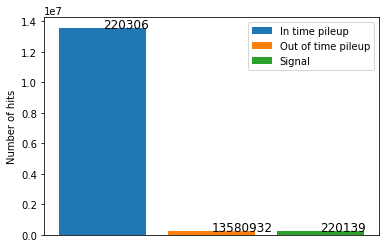

In [5]:
counts = data['sim_type'].value_counts()

plt.bar(0, counts[1], label="In time pileup")
plt.bar(1, counts[2], label="Out of time pileup")
plt.bar(2, counts[0], label="Signal")

plt.ylabel("Number of hits")
plt.xticks([])
plt.legend()
plt.text(x=0 , y =counts[1] + 1 , s=f"{counts[0]}" , fontdict=dict(fontsize=12))
plt.text(x=1 , y =counts[2]+1 , s=f"{counts[1]}" , fontdict=dict(fontsize=12))
plt.text(x=2 , y =counts[0]+1 , s=f"{counts[2]}" , fontdict=dict(fontsize=12))


In [21]:
counts

1    13580932
0      220306
2      220139
Name: sim_type, dtype: int64

In [22]:
pickle = pd.read_pickle('/home/lhv14/validationNtuple/ntuple_PU200/ntuple_PU200_event0_to100.pkl')

In [25]:
pickle

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    89  8805  136545  136545     232   3.235445  0.482192   
      1           1    89  8805  136545  136545    7882   5.839881  0.843352   
      2           1    89  8805  136545  136545   13859  10.604594  1.444473   
      3           1    89  8805  136545  136545   18826  14.779483  1.906379   
      4           1    89  8805  136545  136545    3160  -2.518245  1.226967   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    2255        1    89  8898  155221  155221   18110  -9.228246  5.457322   
      2256        1    89  8898  155221  155221   23213 -12.393078  7.342566   
      2257        1    89  8898  155221  155221    4004  -2.482123  1.361776   
      2258        1    89  8898  155221  155221   18106  -9.519952  4.884818   
      2259        1    89  8898  155221  155221   23221 -12.924232  6.497241   

                        z  particle_id  ...  sim_id  sim_dxy_sig     sim_pt  \
entry subentry                          ...                                   
0     0         -4.421145          353  ...    3735     6.742736   3.393702   
      1         -3.729142          353  ...    3736     0.754287   3.393702   
      2         -2.457679          353  ...    3737     0.082094   3.393702   
      3         -1.346549          353  ...    3738     0.317637   3.393702   
      4        -17.133181          362  ...    3725     0.616264   1.095503   
...                   ...          ...  ...     ...          ...        ...   
99    2255      -4.510040         2157  ...      59    13.802724  22.682255   
      2256      -6.141918         2157  ...      60     0.671920  22.682255   
      2257      -0.942966         2162  ...      18     1.184413   3.020870   
      2258      -4.119591         2162  ...      19     0.858717   3.020870   
      2259      -5.641342         2162  ...      20     0.020459   3.020870   

                 sim_eta   sim_phi  volume_id  layer_id  module_id          r  \
entry subentry                                                                  
0     0         0.261603  0.153152          2         1          4   3.271179   
      1         0.261603  0.153152          2         2          4   5.900462   
      2         0.261603  0.153152          2         3          4  10.702519   
      3         0.261603  0.153152          2         4          5  14.901925   
      4        -2.147595  2.674224          2         1          1   2.801251   
...                  ...       ...        ...       ...        ...        ...   
99    2255     -0.429736  2.610271          2         3          4  10.721142   
      2256     -0.429736  2.610271          2         4          4  14.404918   
      2257     -0.394255  2.655440          2         1          5   2.831142   
      2258     -0.394255  2.655440          2         3          4  10.700044   
      2259     -0.394255  2.655440          2         4          4  14.465473   

                new_layer_ids  
entry subentry                 
0     0                   1.0  
      1                   2.0  
      2                   3.0  
      3                   4.0  
      4                   1.0  
...                       ...  
99    2255                3.0  
      2256                4.0  
      2257                1.0  
      2258                3.0  
      2259                4.0  

[158724 rows x 25 columns]

In [26]:
data

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    89  8805  136545  136545     232   3.235445  0.482192   
      1           1    89  8805  136545  136545    7882   5.839881  0.843352   
      2           1    89  8805  136545  136545   13859  10.604594  1.444473   
      3           1    89  8805  136545  136545   18826  14.779483  1.906379   
      4           1    89  8805  136545  136545    3160  -2.518245  1.226967   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    155216      1    89  8898  155221  155221  155216  24.004881 -2.142081   
      155217      1    89  8898  155221  155221  155217  23.357807 -2.752316   
      155218      1    89  8898  155221  155221  155218  25.234650 -3.048202   
      155219      1    89  8898  155221  155221  155219  24.097187 -3.105161   
      155220      1    89  8898  155221  155221  155220  21.822973 -3.125232   

                         z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                           ...                                  
0     0          -4.421145          353  ...         0    3735     6.742736   
      1          -3.729142          353  ...         0    3736     0.754287   
      2          -2.457679          353  ...         0    3737     0.082094   
      3          -1.346549          353  ...         0    3738     0.317637   
      4         -17.133181          362  ...         0    3725     0.616264   
...                    ...          ...  ...       ...     ...          ...   
99    155216    265.200012           -1  ...         1      -1     0.000000   
      155217    265.200012           -1  ...         1      -1     0.000000   
      155218    265.200012           -1  ...         1      -1     0.000000   
      155219    265.200012           -1  ...         1      -1     0.000000   
      155220    265.200012           -1  ...         1      -1     0.000000   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
0     0         3.393702  0.261603  0.153152          2         1          4   
      1         3.393702  0.261603  0.153152          2         2          4   
      2         3.393702  0.261603  0.153152          2         3          4   
      3         3.393702  0.261603  0.153152          2         4          5   
      4         1.095503 -2.147595  2.674224          2         1          1   
...                  ...       ...       ...        ...       ...        ...   
99    155216    0.144292  1.514907  2.185432          3        12         48   
      155217    0.214671  3.042785 -0.785806          3        12         48   
      155218    0.640394  3.056026 -0.421427          3        12         48   
      155219    0.133436  2.680578 -1.311736          3        12         48   
      155220    0.329789  1.127398 -0.699861          3        12         48   

                        r  
entry subentry             
0     0          3.271179  
      1          5.900462  
      2         10.702519  
      3         14.901925  
      4          2.801251  
...                   ...  
99    155216    24.100266  
      155217    23.519405  
      155218    25.418085  
      155219    24.296429  
      155220    22.045618  

[14021377 rows x 24 columns]

In [11]:
#file = uproot3.open("ntuple_PU200_numEvent1000.root")[b'ntuplizer;1'][b'tree;83']
#data = file.pandas.df(["*"], flatten=False, entrystop=20, entrystart=10)   # not the default
data2 = file.pandas.df(["*"], flatten=True, entrystart=100, entrystop=200)
data['r'] = np.sqrt(data['x']**2 + data['y']**2)


In [12]:
counts2 = data2['sim_type'].value_counts()

In [14]:
counts2+counts

0      436315
1    26971484
2      436607
Name: sim_type, dtype: int64

In [19]:
tmp = 0

In [20]:
tmp+counts

1    13580932
0      220306
2      220139
Name: sim_type, dtype: int64

In [7]:
data[data['sim_type']==1]

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     1504        1    37  3603  132275  132275       0   2.927862  1.630106   
      1505        1    37  3603  132275  132275       1   2.937057  1.595789   
      1506        1    37  3603  132275  132275       2   2.939886  1.585231   
      1507        1    37  3603  132275  132275       3   2.953162  1.535686   
      1508        1    37  3603  132275  132275       4   2.969986  1.472896   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    139951      1    37  3690  139956  139956  139951  22.036810 -2.547982   
      139952      1    37  3690  139956  139956  139952  23.010786 -2.842313   
      139953      1    37  3690  139956  139956  139953  21.208319 -2.789313   
      139954      1    37  3690  139956  139956  139954  24.645046 -3.094739   
      139955      1    37  3690  139956  139956  139955  21.152073 -2.882082   

                         z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                           ...                                  
0     1504      -18.352921           -1  ...         1      -1          0.0   
      1505      -17.990612           -1  ...         1      -1          0.0   
      1506      -18.627415           -1  ...         1      -1          0.0   
      1507      -16.080093           -1  ...         1      -1          0.0   
      1508      -17.703650           -1  ...         1      -1          0.0   
...                    ...          ...  ...       ...     ...          ...   
99    139951    265.200012           -1  ...         1      -1          0.0   
      139952    265.200012           -1  ...         1      -1          0.0   
      139953    265.200012           -1  ...         1      -1          0.0   
      139954    265.200012           -1  ...         1      -1          0.0   
      139955    265.200012           -1  ...         1      -1          0.0   

                  sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                 
0     1504      0.468237 -1.524076  0.467709          2         1          1   
      1505      1.214997 -2.284948  0.482110          2         1          1   
      1506      1.234613 -2.368436  0.478998          2         1          1   
      1507      0.233245 -2.116096  0.560551          2         1          1   
      1508      1.668411 -2.193989  0.449316          2         1          1   
...                  ...       ...       ...        ...       ...        ...   
99    139951    0.179903  2.775005 -0.989638          3        12         48   
      139952    0.176872  2.645725  0.467731          3        12         48   
      139953    0.233792  3.000685  0.362460          3        12         48   
      139954    0.251116  1.487157 -2.009509          3        12         48   
      139955    0.133629  2.501078 -0.265022          3        12         48   

                        r  
entry subentry             
0     1504       3.351063  
      1505       3.342581  
      1506       3.340043  
      1507       3.328588  
      1508       3.315153  
...                   ...  
99    139951    22.183624  
      139952    23.185663  
      139953    21.390957  
      139954    24.838593  
      139955    21.347519  

[13189211 rows x 24 columns]

In [186]:
pd.set_option("display.max_columns", 24)


In [187]:
data.head()

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    37  3603  132275  132275    6741   2.734923 -1.861271   
      1           1    37  3603  132275  132275   12845   5.295255 -3.612239   
      2           1    37  3603  132275  132275   80818   9.777816 -6.696844   
      3           1    37  3603  132275  132275   80844   9.957458 -6.820522   
      4           1    37  3603  132275  132275   80171  10.315056 -7.068929   

                        z  particle_id  pdg_id     gen_pt   gen_eta   gen_phi  \
entry subentry                                                                  
0     0          8.735739          469     -11  15.816891  1.366168 -0.596409   
      1         14.421146          469     -11  15.816891  1.366168 -0.596409   
      2         24.400000          469     -11  15.816891  1.366168 -0.596409   
      3         24.799999          469     -11  15.816891  1.366168 -0.596409   
      4         25.600000          469     -11  15.816891  1.366168 -0.596409   

                sim_type  sim_id  sim_dxy_sig     sim_pt   sim_eta   sim_phi  \
entry subentry                                                                 
0     0                0    1704     1.419558  15.816891  1.366168 -0.596409   
      1                0    1705     5.156816  15.816891  1.366168 -0.596409   
      2                0    4405     0.053190  15.816891  1.366168 -0.596409   
      3                0    4406     0.242483  15.816891  1.366168 -0.596409   
      4                0    4407    16.304440  15.816891  1.366168 -0.596409   

                volume_id  layer_id  module_id          r  
entry subentry                                             
0     0                 2         1          7   3.308192  
      1                 2         2          8   6.409992  
      2                 3         1         29  11.851304  
      3                 3         1         30  12.069403  
      4                 3         1         22  12.504805

In [64]:
data.columns

Index(['run', 'lumi', 'evt', 'nhit', 'hit_n', 'hit_id', 'x', 'y', 'z',
       'particle_id', 'pdg_id', 'gen_pt', 'gen_eta', 'gen_phi', 'sim_type',
       'sim_id', 'sim_dxy_sig', 'sim_pt', 'sim_eta', 'sim_phi', 'volume_id',
       'layer_id', 'module_id', 'r'],
      dtype='object')

In [195]:
#sub = data[data['sim_pt'] > 1]
sub = data[data['particle_id']!= -1]

particle_id_by_event = sub.groupby(['entry', 'particle_id']).agg({'particle_id':'count'})
particle_id_by_event

particle_id
entry particle_id             
0     469                    6
      501                    4
      507                    3
      508                    4
      509                    4
...                        ...
99    654                    2
      655                   19
      716                   15
      744                    4
      745                    8

[13351 rows x 1 columns]

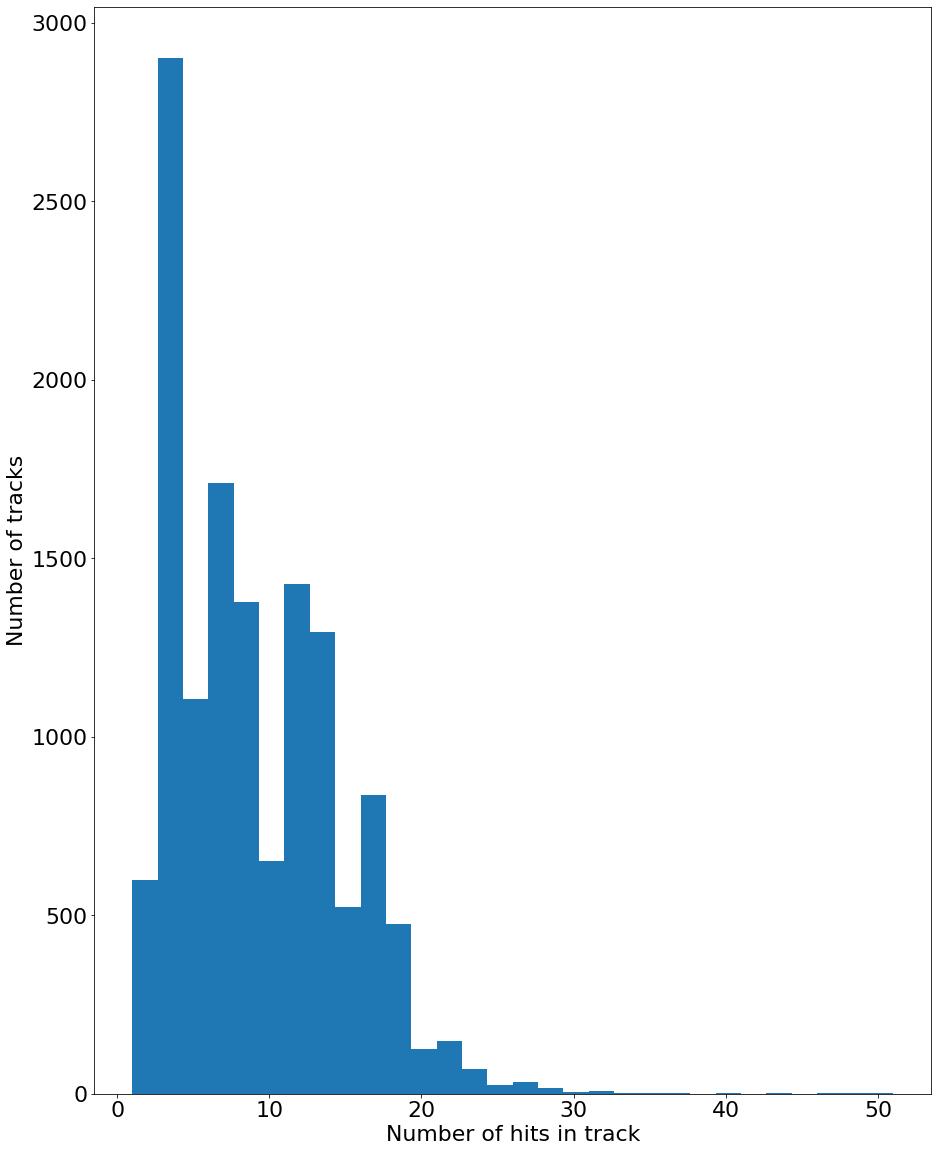

In [236]:
plt.hist(particle_id_by_event['particle_id'], bins=30)
plt.xlabel("Number of hits in track")
plt.ylabel("Number of tracks")
#plt.figure(figsize=(2,2))
plt.rcParams['figure.figsize'] = (15, 20)
plt.rcParams.update({'font.size': 30})


In [31]:
tmp = np.histogram(data['particle_id'])

<AxesSubplot:xlabel='axis0'>

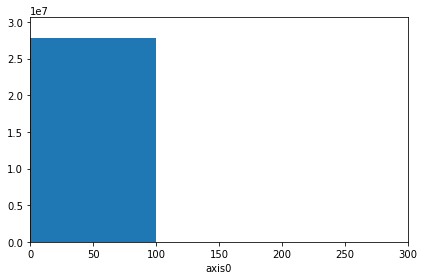

In [38]:
# Necessary import evil
import physt
from physt import h1, h2, histogramdd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ha = h1(None, "fixed_width", bin_width=100, adaptive=True)
#data = pd.read_pickle('/home/lhv14/validationNtuple/ntuple_PU200/ntuple_PU200_event0_to100.pkl')
ha.fill_n(data['sim_pt'])
ha.fill_n(data2['sim_pt'])

ha.plot()
      

In [152]:
sub = sub.query('entry == 0')
particle_id_by_event.query('entry == 0')['particle_id'].unique()

array([ 6,  4,  9, 12,  1,  5, 17, 11,  3])

In [243]:
def is_track_hit(x):
    if x == -1: 
        return 0
    else: 
        return 1 
    

data['is_track_hit'] = data.apply(lambda x: is_track_hit(x.particle_id), axis=1)

In [252]:
track_hit_count = data.groupby(['entry', 'is_track_hit']).agg({'is_track_hit':'count'})

In [273]:
track_hit_count.is_track_hit.query('is_track_hit==1')

AttributeError: 'Series' object has no attribute 'query'

In [282]:
average_num_background_hits = np.mean(track_hit_count.is_track_hit[::2])
average_num_track_hits = np.mean(track_hit_count.is_track_hit[1::2])

In [290]:
round(2.5)

2

Text(1, 1214.37, '1213')

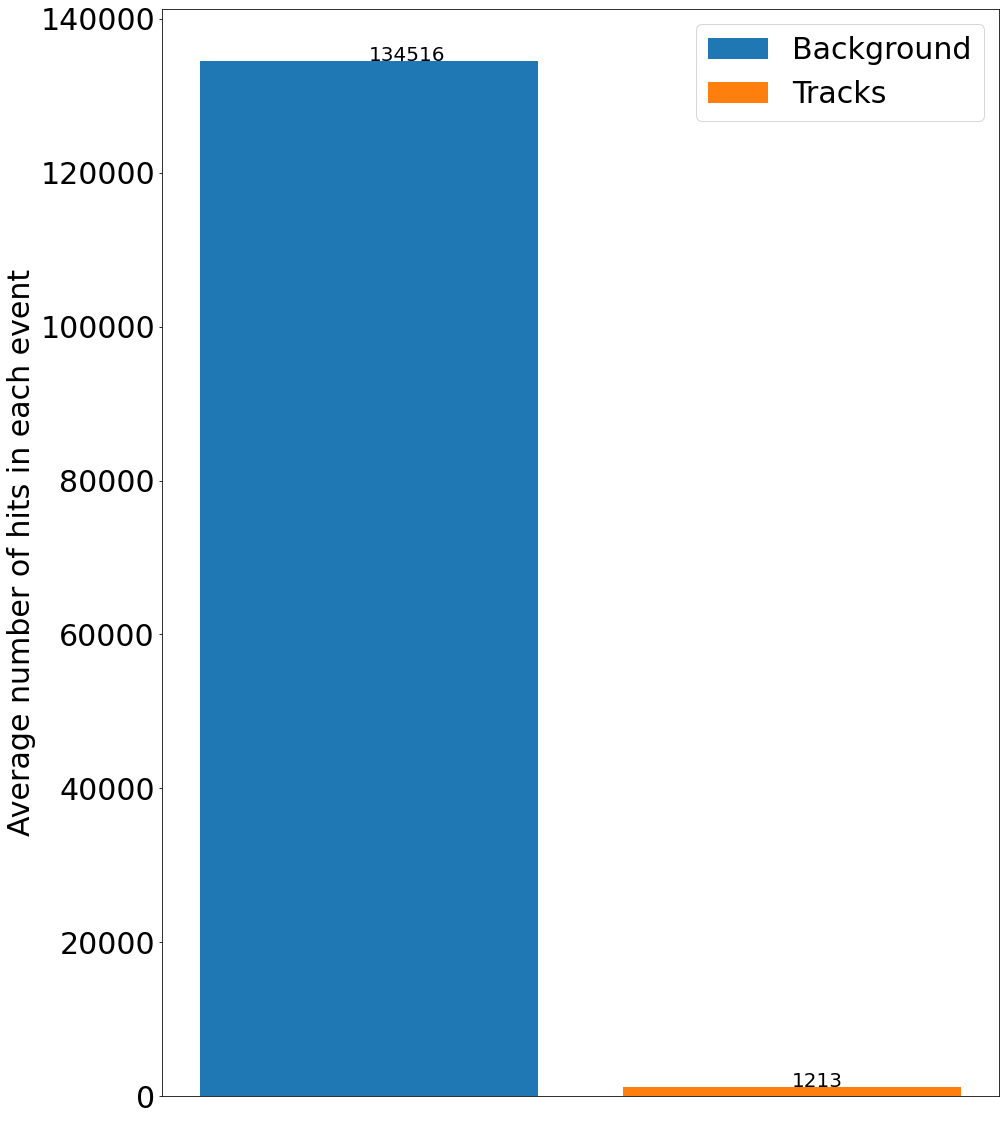

In [291]:
plt.bar(0, average_num_background_hits, label="Background")
plt.bar(1, average_num_track_hits, label="Tracks")
plt.ylabel("Average number of hits in each event")
plt.xticks([])
plt.legend()
plt.text(x=0 , y =average_num_background_hits+1 , s=f"{round(average_num_background_hits)}" , fontdict=dict(fontsize=20))
plt.text(x=1 , y =average_num_track_hits+1 , s=f"{round(average_num_track_hits)}" , fontdict=dict(fontsize=20))

In [410]:
n_tracks_in_event = []
for event in data['evt'].unique(): 
    sub = data[data['evt']==event]
    n_tracks_in_event.append(len(sub['particle_id'].unique()))


Text(0, 0.5, 'Number of events')

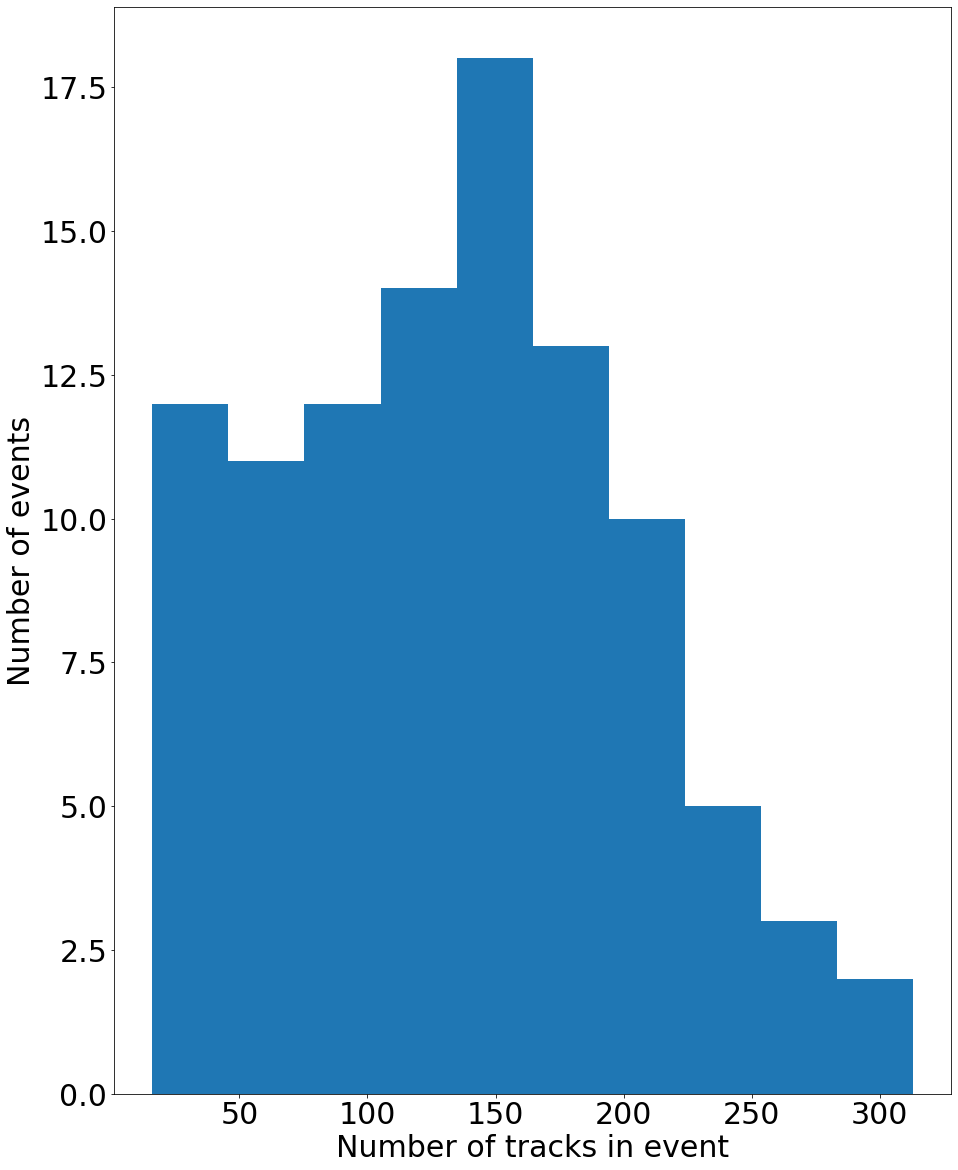

In [413]:
plt.hist(n_tracks_in_event)
plt.xlabel('Number of tracks in event')
plt.ylabel('Number of events')

(array([4.605e+03, 3.742e+03, 3.245e+03, 1.438e+03, 2.440e+02, 5.600e+01,
        1.200e+01, 4.000e+00, 1.000e+00, 4.000e+00]),
 array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51.]),
 <BarContainer object of 10 artists>)

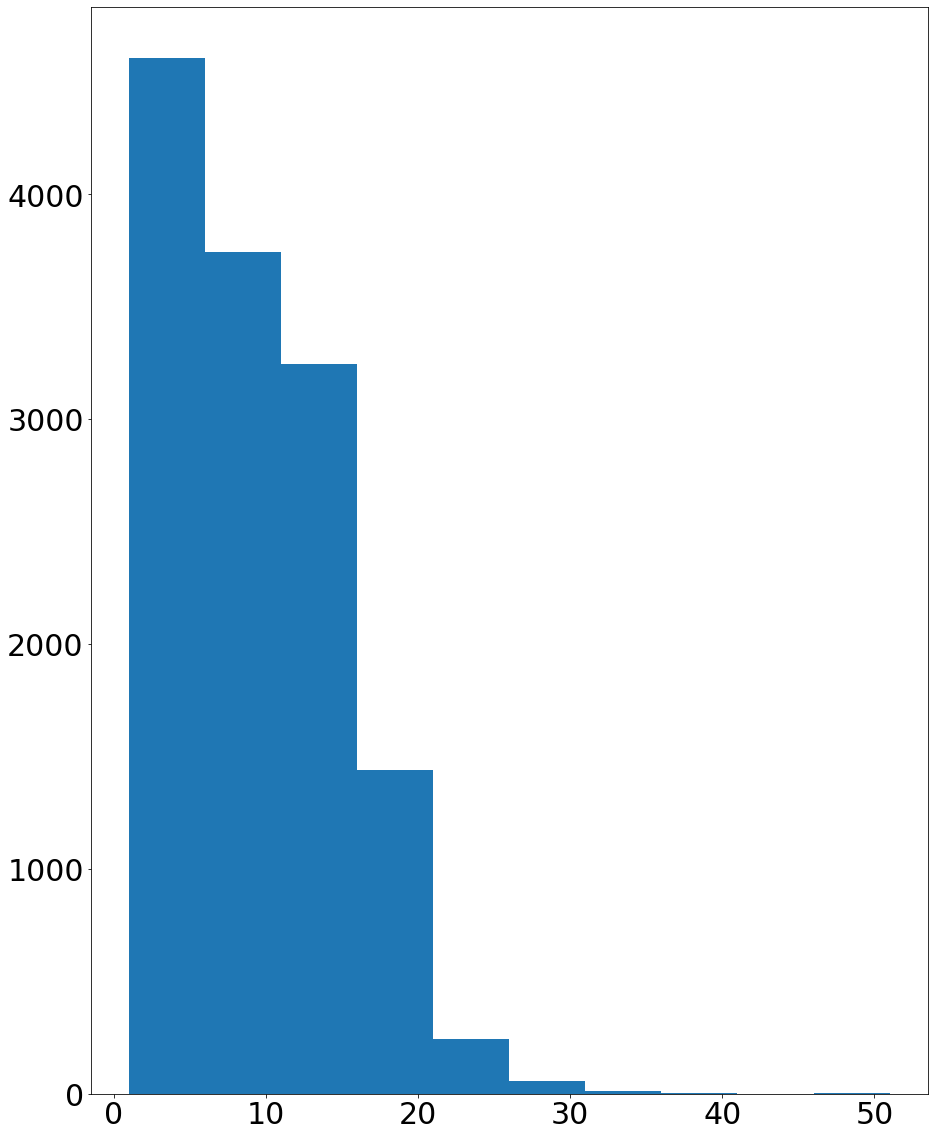

In [421]:
nhits_count = data[data['particle_id']!=-1].groupby(['evt', 'particle_id']).agg({'particle_id':'count'})

plt.hist(nhits_count.particle_id)

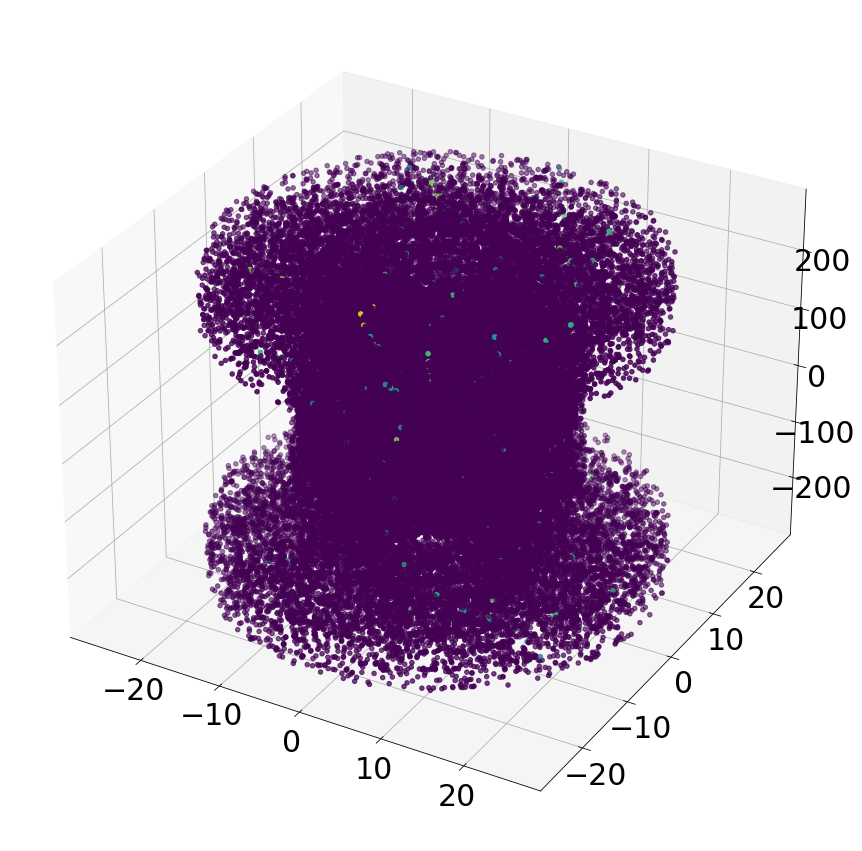

In [470]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter(sub['x'], sub['y'], sub['z'], c =sub['particle_id']);
plt.rcParams['figure.figsize'] = (15, 20)
plt.rcParams.update({'font.size': 30})


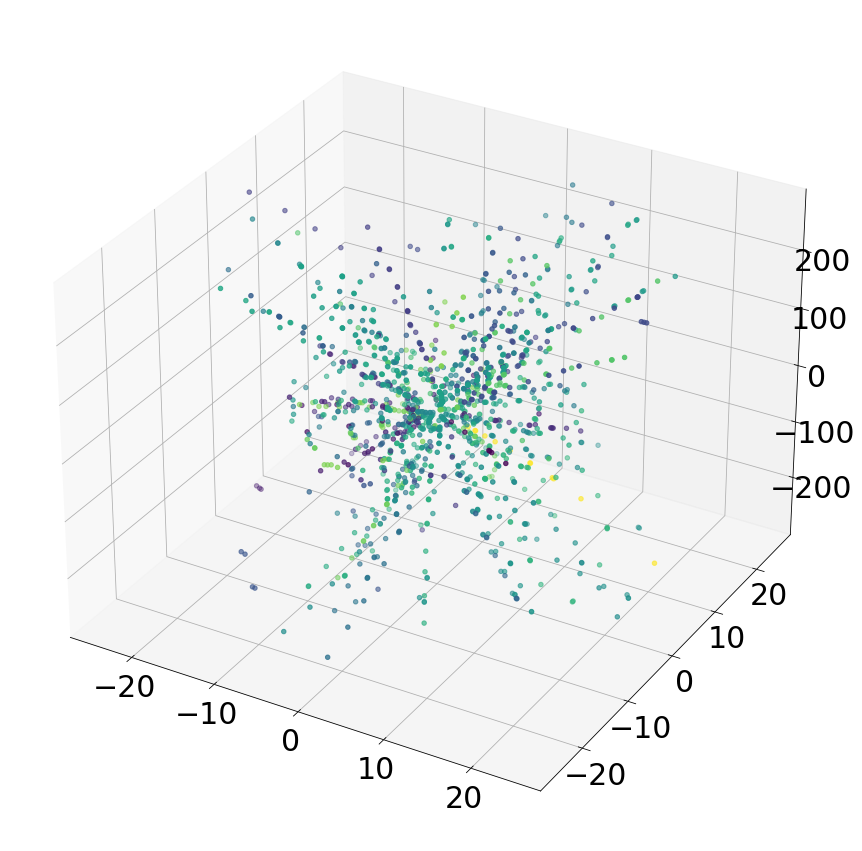

In [485]:
fig = plt.figure()
ax = plt.axes(projection='3d')

sub = data[data['particle_id']!=-1]
sub = sub.query('entry==0')
ax.scatter(sub['x'], sub['y'], sub['z'], c =sub['particle_id']);
plt.rcParams['figure.figsize'] = (15, 20)
plt.rcParams.update({'font.size': 30})


In [461]:
pdg_values = {
    '$\pi$ +': -211, 
    '$\pi$-': 211, 
    'e-': 11, 
    'e+':-11, 
    '$\mu$ -': 13,
    '$\mu$+': -13, 
    '$\gamma$': 22, 
    '$K^0_L$': 130, 
    '$K^0_S$': 310, 
    'K+': 321, 
    'K-': -321,
    'neutron':2112, 
    'proton':2212, 
    '$\Sigma$ -': 3112, 
    '$\overline{\Sigma -}$': -3112,
    '$\Sigma$ +':3222, 
    '$\overline{\Sigma +}$': -3222,
    '$\Xi$ -': 3312,
    '$\overline{\Xi -}$ ': -3312, 
    '$\Xi$ 0': 3322, 
    '$\Lambda$': 3122, 
    '$\overline{\Lambda}$': -3122, 
    '$\overline{proton}$': -2212, 
    '$\overline{neutron}$': -2112,
}

import json

with open('accepted_pdgids.json', 'w') as outfile:
    json.dump(pdg_values, outfile)

In [462]:
inverted_dict =  { pdg_values[k]:k for k in pdg_values}

In [424]:
inverted_dict

{-211: '$\\pi$ +',
 211: 'pi-',
 11: 'e-',
 -11: 'e+',
 13: 'muon -',
 -13: 'muon+',
 22: 'photon',
 130: 'K0L',
 310: 'K0S',
 321: 'K+',
 -321: 'Anti K+',
 2112: 'neutron',
 2212: 'proton',
 3112: 'Sigma -',
 -3112: 'Anti sigma - ',
 3222: 'Sigma +',
 -3222: 'Anti Sigma +',
 -3312: 'Xi -',
 3312: 'Anti Xi - ',
 3322: 'Xi 0',
 3122: 'Lambda',
 -3122: 'Anti lambda',
 -2212: 'anti proton',
 -2112: 'anti neutron'}

In [352]:
#particles = data[data['particle_id']!=-1].pdg_id.value_counts()

particles = data[data['particle_id']!=-1].groupby(['particle_id', 'pdg_id', 'evt']).agg({'pdg_id':'count'})

In [365]:
particles['actual_pdg_ids'] = particles.index.get_level_values(1)

In [378]:
list_of_particle_counts = []
for i in range(len(particles['actual_pdg_ids'].unique())): 
    particle = particles['actual_pdg_ids'].unique()[i]
    particle_count = len(particles[particles['actual_pdg_ids']==particle])
    list_of_particle_counts.append(particle_count)

In [380]:
tmp = pd.DataFrame()
tmp['Particles'] = particles['actual_pdg_ids'].unique()
tmp['Particle_count'] = list_of_particle_counts

In [400]:
tmp = tmp.sort_values(by='Particle_count', ascending=False).reset_index()

Text(0, 0.5, 'Number of particles in all 100 events')

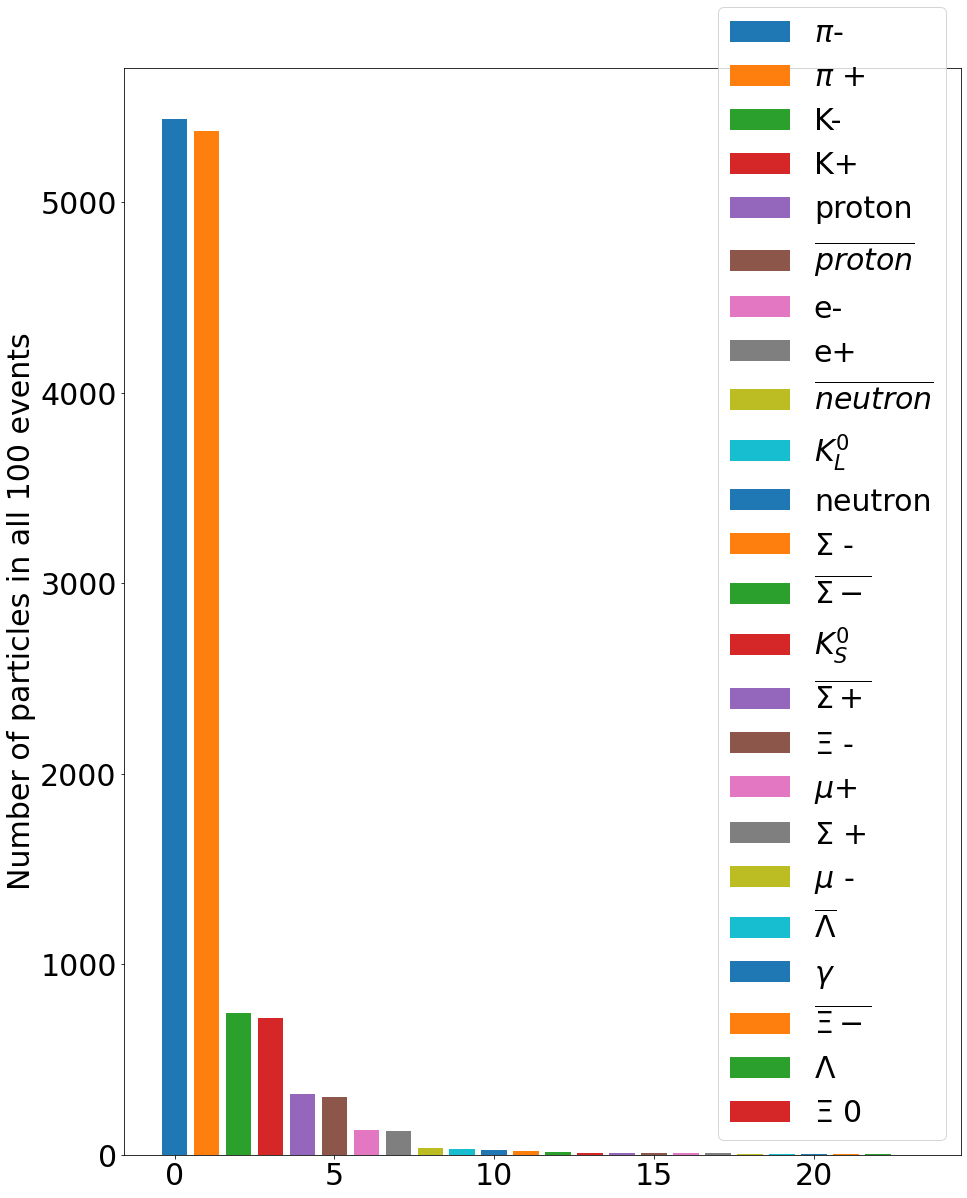

In [465]:
for i in range(len(tmp['Particle_count'])): 
    #print(tmp['Particle_count'][i])
    plt.bar(i, tmp['Particle_count'][i], label=inverted_dict[tmp['Particles'][i]])
    #plt.text(x=i , y =tmp['Particle_count'][i]+1 , s=f"{inverted_dict[tmp['Particles'][i]]}" , fontdict=dict(fontsize=20))
plt.legend()
plt.ylabel('Number of particles in all 100 events')

In [478]:
pts = []
for event in data[data['particle_id']!=-1]['evt'].unique(): 
    tmp = data[data['evt']==event]
    tmp = tmp.drop_duplicates(subset=['particle_id'])
    pts.append(tmp['sim_pt'])

Text(0.5, 0, '$p_T$ (GeV)')

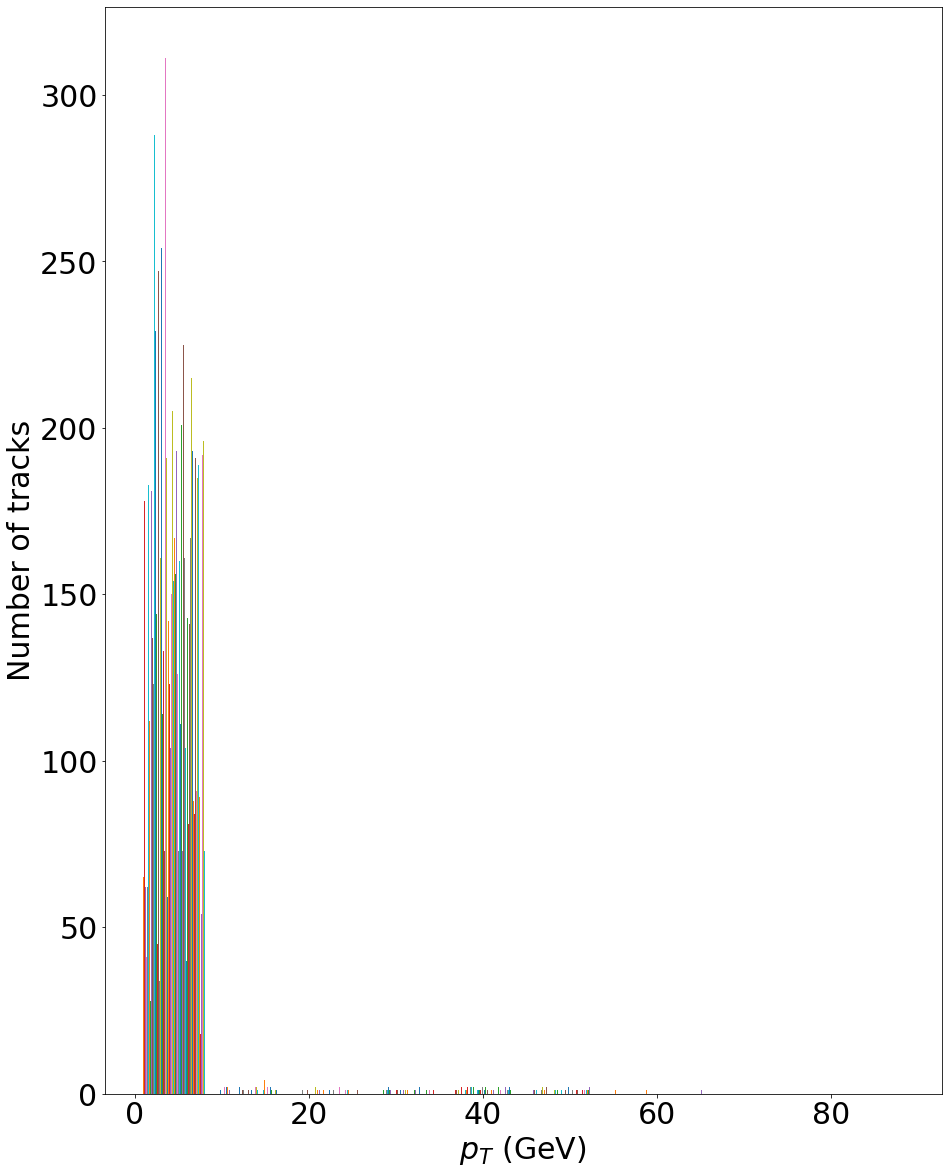

In [481]:
plt.hist(pts);
plt.ylabel('Number of tracks')
plt.xlabel('$p_T$ (GeV)')

In [102]:
[print(value) if value in particles.index for value in pdg_values.values()]

SyntaxError: invalid syntax (<ipython-input-102-ade93fd2b2b3>, line 1)

In [108]:
min(data.sim_pt)

0.0017407441046088934

In [4]:
profile = ProfileReport(data, minimal=True)

profile.to_widgets()

# 1. Event level checks

In [73]:
data.isnull().values.any()

False

In [68]:
print(data[data.isnull().values])

Empty DataFrame
Columns: [run, lumi, evt, nhit, hit_n, hit_id, x, y, z, particle_id, pdg_id, gen_pt, gen_eta, gen_phi, sim_type, sim_id, sim_dxy_sig, sim_pt, sim_eta, sim_phi, volume_id, layer_id, module_id, r]
Index: []

[0 rows x 24 columns]


In [91]:
data

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    37  3603  132275  132275    6741   2.734923 -1.861271   
      1           1    37  3603  132275  132275   12845   5.295255 -3.612239   
      2           1    37  3603  132275  132275   80818   9.777816 -6.696844   
      3           1    37  3603  132275  132275   80844   9.957458 -6.820522   
      4           1    37  3603  132275  132275   80171  10.315056 -7.068929   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    139951      1    37  3690  139956  139956  139951  22.036810 -2.547982   
      139952      1    37  3690  139956  139956  139952  23.010786 -2.842313   
      139953      1    37  3690  139956  139956  139953  21.208319 -2.789313   
      139954      1    37  3690  139956  139956  139954  24.645046 -3.094739   
      139955      1    37  3690  139956  139956  139955  21.152073 -2.882082   

                         z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                           ...                                  
0     0           8.735739          469  ...         0    1704     1.419558   
      1          14.421146          469  ...         0    1705     5.156816   
      2          24.400000          469  ...         0    4405     0.053190   
      3          24.799999          469  ...         0    4406     0.242483   
      4          25.600000          469  ...         0    4407    16.304440   
...                    ...          ...  ...       ...     ...          ...   
99    139951    265.200012           -1  ...         1      -1     0.000000   
      139952    265.200012           -1  ...         1      -1     0.000000   
      139953    265.200012           -1  ...         1      -1     0.000000   
      139954    265.200012           -1  ...         1      -1     0.000000   
      139955    265.200012           -1  ...         1      -1     0.000000   

                   sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                  
0     0         15.816891  1.366168 -0.596409          2         1          7   
      1         15.816891  1.366168 -0.596409          2         2          8   
      2         15.816891  1.366168 -0.596409          3         1         29   
      3         15.816891  1.366168 -0.596409          3         1         30   
      4         15.816891  1.366168 -0.596409          3         1         22   
...                   ...       ...       ...        ...       ...        ...   
99    139951     0.179903  2.775005 -0.989638          3        12         48   
      139952     0.176872  2.645725  0.467731          3        12         48   
      139953     0.233792  3.000685  0.362460          3        12         48   
      139954     0.251116  1.487157 -2.009509          3        12         48   
      139955     0.133629  2.501078 -0.265022          3        12         48   

                        r  
entry subentry             
0     0          3.308192  
      1          6.409992  
      2         11.851304  
      3         12.069403  
      4         12.504805  
...                   ...  
99    139951    22.183624  
      139952    23.185663  
      139953    21.390957  
      139954    24.838593  
      139955    21.347519  

[13572908 rows x 24 columns]

In [90]:
agg_by_evt = data.groupby(['entry', 'evt']).agg({'evt':'count'})
num_unique_evt = agg_by_evt['evt'].unique() 


In [88]:
len(data.index.get_level_values(0).unique())

100

In [110]:
np.array(agg_by_evt.index.get_level_values(1))
agg_by_evt.index.get_level_values(1).duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

(array([ 203050.,  439136.,  937430., 1750075., 2504113., 3159865.,
        1163317., 2135880., 1109666.,  170376.]),
 array([ 99562. , 106643.4, 113724.8, 120806.2, 127887.6, 134969. ,
        142050.4, 149131.8, 156213.2, 163294.6, 170376. ]),
 <BarContainer object of 10 artists>)

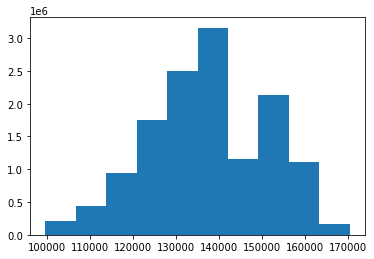

In [44]:
plt.hist(data['nhit'])

In [ ]:
agg_by_entry_hit_id  = data.groupby(['entry']).agg('count')

# 2. Hit info checks

In [74]:
agg_by_entry_hit_id  = data.groupby(['entry', 'hit_id']).agg({'hit_id':'count'})

In [21]:
# no duplicate hit ids within each event 
if agg_by_entry_hit_id['hit_id'].max() > 1: 
    print("Error, duplicated hit id within event")

Text(0, 0.5, 'number of hits within 100 events')

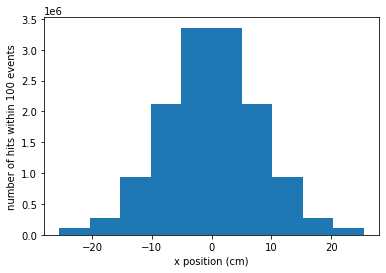

In [30]:
plt.hist(data.x); 
plt.xlabel('x position (cm)')
plt.ylabel('number of hits within 100 events')

In [15]:
data.groupby(['entry', 'hit_id']).agg('count')

run  lumi  evt  nhit  hit_n  x  y  z  particle_id  pdg_id  ...  \
entry hit_id                                                             ...   
0     0         1     1    1     1      1  1  1  1            1       1  ...   
      1         1     1    1     1      1  1  1  1            1       1  ...   
      2         1     1    1     1      1  1  1  1            1       1  ...   
      3         1     1    1     1      1  1  1  1            1       1  ...   
      4         1     1    1     1      1  1  1  1            1       1  ...   
...           ...   ...  ...   ...    ... .. .. ..          ...     ...  ...   
99    139951    1     1    1     1      1  1  1  1            1       1  ...   
      139952    1     1    1     1      1  1  1  1            1       1  ...   
      139953    1     1    1     1      1  1  1  1            1       1  ...   
      139954    1     1    1     1      1  1  1  1            1       1  ...   
      139955    1     1    1     1      1  1  1  1            1       1  ...   

              gen_phi  sim_type  sim_id  sim_dxy_sig  sim_pt  sim_eta  \
entry hit_id                                                            
0     0             1         1       1            1       1        1   
      1             1         1       1            1       1        1   
      2             1         1       1            1       1        1   
      3             1         1       1            1       1        1   
      4             1         1       1            1       1        1   
...               ...       ...     ...          ...     ...      ...   
99    139951        1         1       1            1       1        1   
      139952        1         1       1            1       1        1   
      139953        1         1       1            1       1        1   
      139954        1         1       1            1       1        1   
      139955        1         1       1            1       1        1   

              sim_phi  volume_id  layer_id  module_id  
entry hit_id                                           
0     0             1          1         1          1  
      1             1          1         1          1  
      2             1          1         1          1  
      3             1          1         1          1  
      4             1          1         1          1  
...               ...        ...       ...        ...  
99    139951        1          1         1          1  
      139952        1          1         1          1  
      139953        1          1         1          1  
      139954        1          1         1          1  
      139955        1          1         1          1  

[13572908 rows x 22 columns]

<ipython-input-34-6bc288756ad0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event0['r'] = np.sqrt(event0['x']**2 + event0['y']**2)


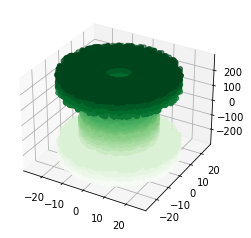

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')

event0 = data.query('entry == 0')

#    r = np.sqrt(hits.x**2 + hits.y**2)
event0['r'] = np.sqrt(event0['x']**2 + event0['y']**2)


ax.scatter(event0['x'], event0['y'], event0['z'], c =event0['z'], cmap='Greens');


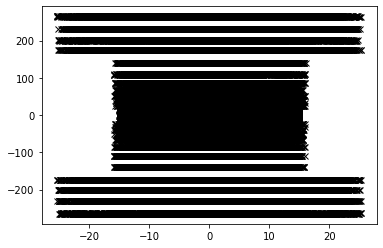

In [5]:
plt.plot(event0['x'], event0['z'], "kx")

In [29]:
event0_inner = event0[(event0['z'] > -50) & (event0['z'] < 50)]

Text(0, 0.5, 'r (cm)')

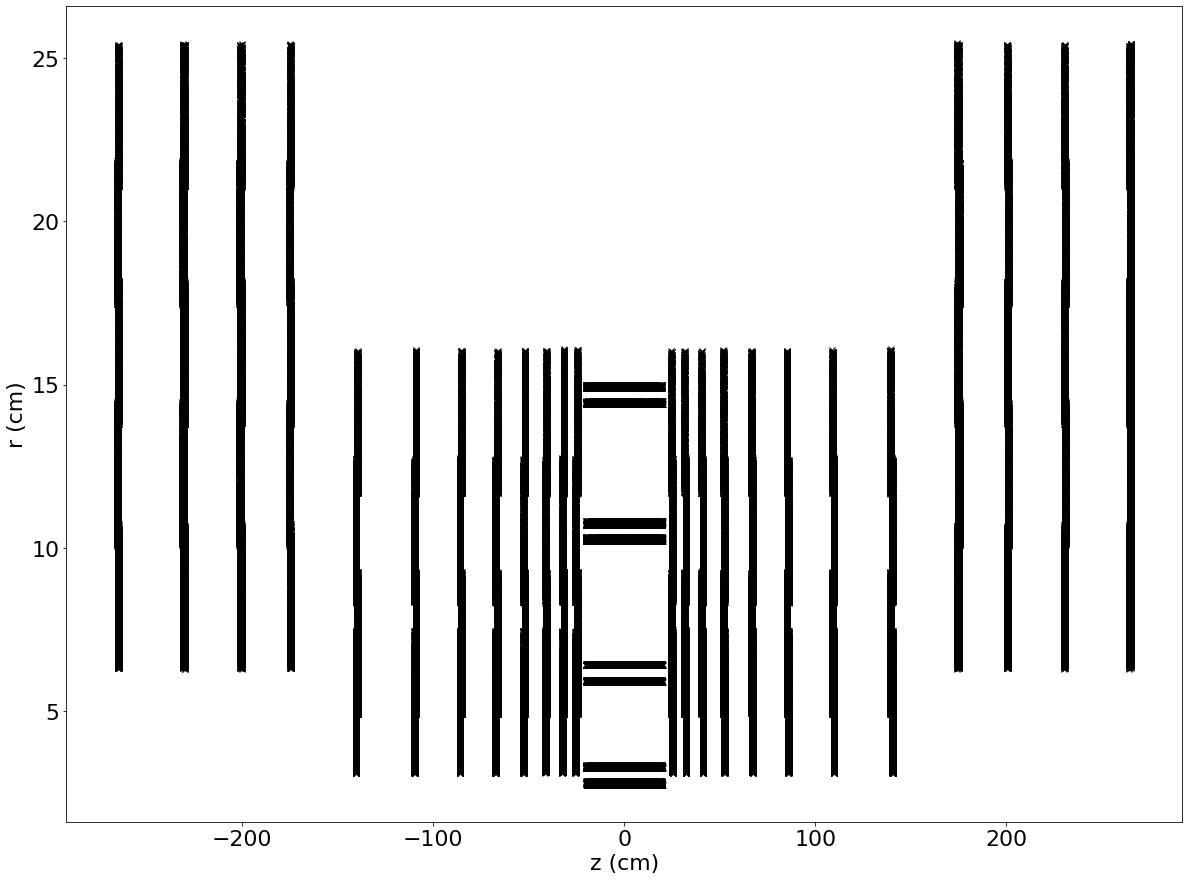

In [46]:
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 22})

plt.plot(event0['z'], event0['r'], "kx")
plt.xlabel("z (cm)")
plt.ylabel("r (cm)")

In [3]:
# all hits must lie within defined hit regions
!wget https://raw.githubusercontent.com/cms-sw/cmssw/master/Geometry/TrackerNumberingBuilder/data/ModuleNumbering_120.dat

--2021-08-05 15:04:13--  https://raw.githubusercontent.com/cms-sw/cmssw/master/Geometry/TrackerNumberingBuilder/data/ModuleNumbering_120.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1087908 (1.0M) [text/plain]
Saving to: ‘ModuleNumbering_120.dat.1’

ModuleNumbering_120 100%[===================>]   1.04M  5.48MB/s    in 0.2s    

2021-08-05 15:04:13 (5.48 MB/s) - ‘ModuleNumbering_120.dat.1’ saved [1087908/1087908]



In [4]:
modules = pd.read_table('ModuleNumbering_120.dat', sep=' ', header=None)

In [64]:
np.unique(data['z'])*10 in np.unique(modules[2])

<ipython-input-64-bfaf31b9e712>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.unique(data['x'])*10 in np.unique(modules[2])


False

In [14]:
[elem in np.unique(data['z'])*10 for elem in np.unique(modules[4])]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [70]:
any(elem in np.unique(data['x'])*10  for elem in np.unique(modules[2]))

True

In [146]:
max(data[data['volume_id']==2]['layer_id']) == 4

True

(array([1.3455907e+07, 1.1728000e+04, 1.9757000e+04, 2.5133000e+04,
        2.6003000e+04, 1.5790000e+04, 1.1620000e+04, 5.3820000e+03,
        1.3610000e+03, 2.2700000e+02]),
 array([-1.000e+00,  2.810e+02,  5.630e+02,  8.450e+02,  1.127e+03,
         1.409e+03,  1.691e+03,  1.973e+03,  2.255e+03,  2.537e+03,
         2.819e+03]),
 <BarContainer object of 10 artists>)

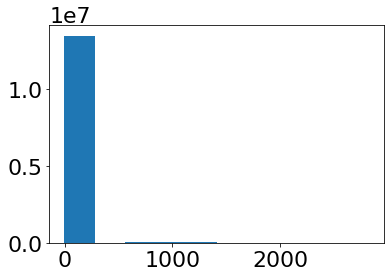

In [72]:
plt.hist(data['particle_id'])

(array([ 32., 136., 136., 114., 270., 397., 227., 142.,  38.,  12.]),
 array([ 469. ,  543.4,  617.8,  692.2,  766.6,  841. ,  915.4,  989.8,
        1064.2, 1138.6, 1213. ]),
 <BarContainer object of 10 artists>)

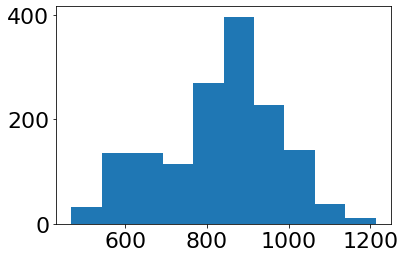

In [77]:
plt.hist(event0[event0['particle_id']> 0]['particle_id'])

(array([5624776.,       0.,       0.,       0.,       0., 2274185.,
              0.,       0.,       0., 5673947.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

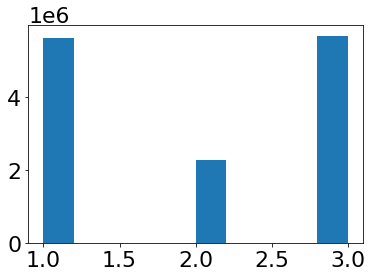

In [81]:
plt.hist(data['volume_id'])

(array([3430344., 3093197., 2120052., 1693243., 1417137.,  894030.,
         511684.,  200273.,  136890.,   76058.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <BarContainer object of 10 artists>)

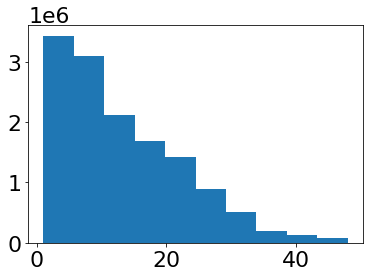

In [82]:
plt.hist(data['module_id'])

(array([2.000000e+00, 3.100000e+01, 5.730000e+02, 1.801400e+04,
        4.467132e+06, 7.862645e+06, 1.616367e+06, 5.379300e+04,
        2.598000e+03, 2.220000e+02]),
 array([-7.8683534 , -6.5733757 , -5.2783976 , -3.9834197 , -2.6884418 ,
        -1.3934639 , -0.09848595,  1.196492  ,  2.4914699 ,  3.7864478 ,
         5.0814257 ], dtype=float32),
 <BarContainer object of 10 artists>)

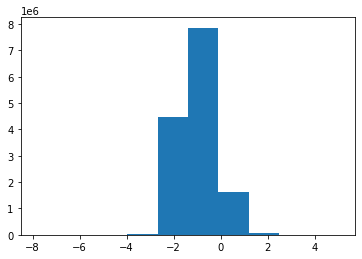

In [40]:
plt.hist(np.log(data['sim_pt']))

In [25]:
data[data['sim_pt'] > 80]

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
71    5           1    37  3670  161522  161522    5996  -1.918380 -1.970707   
      6           1    37  3670  161522  161522    6001  -1.909134 -1.979954   
      7           1    37  3670  161522  161522   14046  -4.472392 -4.635236   
      8           1    37  3670  161522  161522   99097  -7.037657 -7.289317   
      9           1    37  3670  161522  161522   99144  -7.175871 -7.428725   
      10          1    37  3670  161522  161522  105203  -9.181468 -9.506912   
      11          1    37  3670  161522  161522  105184  -9.320993 -9.649837   
76    0           1    37  3679  138629  138629   10869  -6.319121  1.033813   
      1           1    37  3679  138629  138629   16372 -10.066780  1.643875   
      2           1    37  3679  138629  138629   21021 -14.229880  2.318545   

                        z  particle_id  ...   gen_phi  sim_type  sim_id  \
entry subentry                          ...                               
71    5         10.328066          875  ... -2.337883         0    3690   
      6         10.410013          875  ... -2.337883         0    3663   
      7         17.803093          875  ... -2.337883         0    3664   
      8         25.200001          875  ... -2.337883         0    5970   
      9         25.600000          875  ... -2.337883         0    6041   
      10        31.375999          875  ... -2.337883         0    5972   
      11        31.775999          875  ... -2.337883         0    5973   
76    0         -8.164096          587  ...  2.979028         0    2072   
      1         -9.745915          587  ...  2.979028         0    2073   
      2        -11.497783          587  ...  2.979028         0    2074   

                sim_dxy_sig     sim_pt   sim_eta   sim_phi  volume_id  \
entry subentry                                                          
71    5            4.757970  89.181679  1.445074 -2.337883          2   
      6            0.486227  89.181679  1.445074 -2.337883          2   
      7            0.182536  89.181679  1.445074 -2.337883          2   
      8           22.370441  89.181679  1.445074 -2.337883          3   
      9            7.774761  89.181679  1.445074 -2.337883          3   
      10           1.985921  89.181679  1.445074 -2.337883          3   
      11           0.993689  89.181679  1.445074 -2.337883          3   
76    0            0.212689  81.734306 -0.405085  2.979028          2   
      1            0.248828  81.734306 -0.405085  2.979028          2   
      2            2.406095  81.734306 -0.405085  2.979028          2   

                layer_id  module_id  
entry subentry                       
71    5                1          7  
      6                1          7  
      7                2          9  
      8                1         15  
      9                1         16  
      10               2         21  
      11               2         20  
76    0                2          3  
      1                3          3  
      2                4          2  

[10 rows x 23 columns]

In [26]:
particle1 = pd.read_csv('/home/lhv14/exatrkx/Tracking-ML-Exa.TrkX/alldata/train_1/event000001000-particles.csv')

In [28]:
particle1.describe()

particle_id            vx            vy            vz            px  \
count  1.226300e+04  12263.000000  12263.000000  12263.000000  12263.000000   
mean   4.803273e+17      1.107652      0.767732      7.498848     -0.003691   
std    2.983347e+17    124.103059    124.627595    537.857006      0.930213   
min    4.503668e+15   -955.514000   -901.665000  -2955.500000    -45.300700   
25%    2.161771e+17     -0.017552     -0.013040     -5.444660     -0.215898   
50%    4.548682e+17      0.000457      0.002574     -0.438758     -0.005679   
75%    7.431018e+17      0.014919      0.013532      6.016730      0.203908   
max    9.683079e+17    968.200000    980.807000   2950.000000     53.201600   

                 py            pz             q         nhits  
count  12263.000000  12263.000000  12263.000000  12263.000000  
mean       0.000103      0.100067      0.107233      8.424121  
std        0.640033      7.765764      0.994274      5.033464  
min      -16.516300    -95.573400     -1.000000      0.000000  
25%       -0.208301     -0.815998     -1.000000      4.000000  
50%        0.006612      0.001188      1.000000     10.000000  
75%        0.215444      0.848551      1.000000     12.000000  
max       11.169400    459.528000      1.000000     19.000000

In [41]:
pixelBarrel = pd.read_csv('PixelBarrel.csv', index_col = None, header=None).T
pixelBarrel.columns= pixelBarrel.iloc[0,:]
pixelBarrel = pixelBarrel.shift(-1).iloc[0:-1] 
pixelBarrel = pixelBarrel.apply(lambda x: x/10 if x.name in ['r', 'z_max'] else x)

In [42]:
pixelBarrel

0 Layer      r    z_max
0     1      3  20.0725
1     2   6.15  20.0725
2     3  10.45  20.0725
3     4  14.65  20.0725

In [78]:
checks_passed = []
for i in range(1,5):
    checks_passed.append(min(data[(data['volume_id']== 2) & (data['layer_id'] == i)]['r']) > (pixelBarrel['r'][i-1] - 0.4))
    checks_passed.append(max(data[(data['volume_id']== 2) & (data['layer_id'] == i)]['r']) < (pixelBarrel['r'][i-1] + 0.4))

    print(pixelBarrel['r'][i-1] - 0.5)

2.5
5.65
9.95
14.15


In [80]:
False in checks_passed

False

In [100]:
pixelEndcaps = pd.read_csv('PixelEndcap.csv', index_col = None, header=None).T
pixelEndcaps.columns= pixelEndcaps.iloc[0,:]
pixelEndcaps = pixelEndcaps.shift(-1).iloc[0:-1] 
pixelEndcaps = pixelEndcaps.apply(lambda x: x/10 if x.name in ['r', 'z'] else x)
pixelEndcaps['Disk'] = range(1,13)

In [104]:
pixelEndcaps

0   Disk        z
0      1       25
1      2   31.976
2      3   40.899
3      4   52.311
4      5   66.908
5      6   85.578
6      7  109.457
7      8      140
8      9      175
9     10  200.959
10    11  230.769
11    12      265

In [106]:
data[(data['volume_id']== 1) & (data['layer_id'] == 12)]['z']

entry  subentry
0      82         -265.200012
       107        -265.200012
       278        -264.399994
       347        -264.399994
       348        -264.399994
                      ...    
99     82536      -264.399994
       82537      -264.399994
       82538      -264.399994
       82539      -264.399994
       82540      -264.399994
Name: z, Length: 519808, dtype: float32

In [144]:
checks_passed = []
for i in range(1,12):
    checks_passed.append(min(data[(data['volume_id']== 1) & (data['layer_id'] == i)]['z']) > (-pixelEndcaps['z'][i-1] - 0.8))
    checks_passed.append(max(data[(data['volume_id']== 1) & (data['layer_id'] == i)]['z']) < (-pixelEndcaps['z'][i-1] + 0.8))
    
    checks_passed.append(min(data[(data['volume_id']== 3) & (data['layer_id'] == i)]['z']) > (pixelEndcaps['z'][i-1] - 0.8))
    checks_passed.append(max(data[(data['volume_id']== 3) & (data['layer_id'] == i)]['z']) < (pixelEndcaps['z'][i-1] + 0.8))


In [127]:
min(data[(data['volume_id']== 1) & (data['layer_id'] == 11)]['z'])

-231.36900329589844

In [129]:
-pixelEndcaps['z'][10]-1.5

-232.269

In [145]:
checks_passed

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

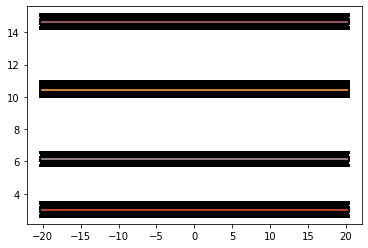

In [63]:
z_vals = np.linspace(-pixelBarrel['z_max'], pixelBarrel['z_max'], 10)
barrel_data = data[(data['layer_id'] < 5) & (data['volume_id']==2)]
#mpl.rcParams['agg.path.chunksize'] = 10000

plt.plot(barrel_data['z'], barrel_data['r'], "kx")
plt.plot(z_vals, np.repeat(pixelBarrel['r'][0], len(z_vals)))
plt.plot(z_vals, np.repeat(pixelBarrel['r'][1], len(z_vals)))
plt.plot(z_vals, np.repeat(pixelBarrel['r'][2], len(z_vals)))
plt.plot(z_vals, np.repeat(pixelBarrel['r'][3], len(z_vals)))


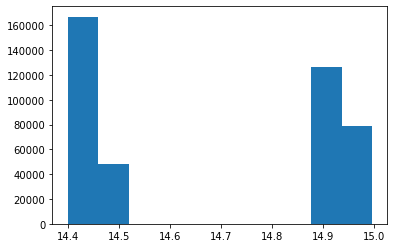

In [118]:
plt.hist(barrel_data[barrel_data['r'] > 11]['r']); 

In [ ]:
def hit_within_layer_r_range(layer, hit): 
    
    hit_r = barrel_data[barrel_data['r'] > 11]['r']
    
    layer_r = pixelBarrel[pixelBarrel['Layer']==layer]['r']
    if hit_r
    
    

In [227]:
#pixelBarrel[pixelBarrel['Layer'==1]]
pixelBarrel[pixelBarrel['Layer']==1]
#pixelBarrel.columns
#data.query('entry == 0')

0 Layer   r    z_max
1     1  30  200.725

In [111]:
data[(data['layer_id'] < 5) & (data['volume_id']==2)]

run  lumi   evt    nhit   hit_n  hit_id          x          y  \
entry subentry                                                                  
0     0           1    37  3603  132275  132275    6741   2.734923  -1.861271   
      1           1    37  3603  132275  132275   12845   5.295255  -3.612239   
      6           1    37  3603  132275  132275    5408  -0.590594  -3.206398   
      7           1    37  3603  132275  132275   11857  -1.091118  -6.311577   
      8           1    37  3603  132275  132275   16972  -1.653440 -10.571497   
...             ...   ...   ...     ...     ...     ...        ...        ...   
99    23768       1    37  3690  139956  139956   23071  14.394905  -0.853909   
      23769       1    37  3690  139956  139956   23072  14.397672  -0.829349   
      23770       1    37  3690  139956  139956   23073  14.423770  -0.597723   
      23771       1    37  3690  139956  139956   23074  14.456406  -0.308072   
      23772       1    37  3690  139956  139956   23075  14.485770  -0.047455   

                        z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                          ...                                  
0     0          8.735739          469  ...         0    1704     1.419558   
      1         14.421146          469  ...         0    1705     5.156816   
      6          3.617810          501  ...         0    1679     3.538205   
      7          4.527171          501  ...         0    1680     0.753341   
      8          5.769243          501  ...         0    1681     1.881539   
...                   ...          ...  ...       ...     ...          ...   
99    23768     17.879469           -1  ...         1      -1     0.000000   
      23769     19.576929           -1  ...         2      -1     0.000000   
      23770     16.437279           -1  ...         1      -1     0.000000   
      23771     18.098116           -1  ...         1      -1     0.000000   
      23772     15.847101           -1  ...         1      -1     0.000000   

                   sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                  
0     0         15.816891  1.366168 -0.596409          2         1          7   
      1         15.816891  1.366168 -0.596409          2         2          8   
      6          1.605040  0.284477 -1.764801          2         1          6   
      7          1.605040  0.284477 -1.764801          2         2          6   
      8          1.605040  0.284477 -1.764801          2         3          6   
...                   ...       ...       ...        ...       ...        ...   
99    23768      1.533768  0.906125 -0.005535          2         4          9   
      23769      0.283298  0.155412  2.515887          2         4          9   
      23770      0.186233  0.648198  0.417759          2         4          9   
      23771      0.104942  0.176451 -0.151508          2         4          9   
      23772      0.207859  0.223034  2.347529          2         4          9   

                        r  
entry subentry             
0     0          3.308192  
      1          6.409992  
      6          3.260336  
      7          6.405197  
      8         10.700019  
...                   ...  
99    23768     14.420210  
      23769     14.421538  
      23770     14.436150  
      23771     14.459688  
      23772     14.485848  

[2274185 rows x 24 columns]

In [96]:
z_vals = np.arange(-pixelBarrel['z_max'], pixelBarrel['z_max'], 2)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [91]:
z_vals

array([[-200.725, -200.725, -200.725, -200.725]], dtype=object)

In [67]:
modules = pd.read_csv('DetId_modules_list.csv')
modules = modules.rename(columns=lambda x: x.strip())
modules['r_cm/D'] = modules['r_mm/D']/10
modules['z_cm/D'] = modules['z_mm/D']/10


In [54]:
len([r for r in dets['r_cm/D'] if r in data['r']])

90

In [55]:
len([z for z in dets['z_cm/D'] if z in data['z']])

164

In [68]:
modules

DetId/U                     BinaryDetId/B Section/C  Layer/I  Ring/I  \
0      441201716  00011010010011000011010000110100      TB2S        1       1   
1      441201720  00011010010011000011010000111000      TB2S        1       2   
2      441201724  00011010010011000011010000111100      TB2S        1       3   
3      441201728  00011010010011000011010001000000      TB2S        1       4   
4      441201732  00011010010011000011010001000100      TB2S        1       5   
...          ...                               ...       ...      ...     ...   
17087  355488800  00010101001100000101010000100000    FPIX_2        4       5   
17088  355488804  00010101001100000101010000100100    FPIX_2        4       5   
17089  355488808  00010101001100000101010000101000    FPIX_2        4       5   
17090  355488812  00010101001100000101010000101100    FPIX_2        4       5   
17091  355488816  00010101001100000101010000110000    FPIX_2        4       5   

        r_mm/D       z_mm/D  tiltAngle_deg/D  skewAngle_deg/D  phi_deg/D  \
0      705.050    52.800359              0.0              0.0      90.00   
1      700.550   151.683666              0.0              0.0      90.00   
2      705.050   252.508256              0.0              0.0      90.00   
3      700.550   349.525825              0.0              0.0      90.00   
4      705.050   450.837156              0.0              0.0      90.00   
...        ...          ...              ...              ...        ...   
17087  232.225  2652.000000             90.0              0.0      56.25   
17088  232.225  2644.000000             90.0              0.0      63.75   
17089  232.225  2652.000000             90.0              0.0      71.25   
17090  232.225  2644.000000             90.0              0.0      78.75   
17091  232.225  2652.000000             90.0              0.0      86.25   

       meanWidth_mm/D  length_mm/D  sensorSpacing_mm/D  sensorThickness_mm/D  \
0               91.44       100.50                 1.8                  0.20   
1               91.44       100.50                 1.8                  0.20   
2               91.44       100.50                 1.8                  0.20   
3               91.44       100.50                 1.8                  0.20   
4               91.44       100.50                 1.8                  0.20   
...               ...          ...                 ...                   ...   
17087           33.85        43.45                 0.0                  0.15   
17088           33.85        43.45                 0.0                  0.15   
17089           33.85        43.45                 0.0                  0.15   
17090           33.85        43.45                 0.0                  0.15   
17091           33.85        43.45                 0.0                  0.15   

        r_cm/D      z_cm/D  
0      70.5050    5.280036  
1      70.0550   15.168367  
2      70.5050   25.250826  
3      70.0550   34.952582  
4      70.5050   45.083716  
...        ...         ...  
17087  23.2225  265.200000  
17088  23.2225  264.400000  
17089  23.2225  265.200000  
17090  23.2225  264.400000  
17091  23.2225  265.200000  

[17092 rows x 16 columns]

In [36]:
data.describe()

run        lumi           evt          nhit         hit_n  \
count  13572908.0  13572908.0  1.357291e+07  1.357291e+07  1.357291e+07   
mean          1.0        37.0  3.650222e+03  1.371774e+05  1.371774e+05   
std           0.0         0.0  2.864243e+01  1.389425e+04  1.389425e+04   
min           1.0        37.0  3.601000e+03  9.956200e+04  9.956200e+04   
25%           1.0        37.0  3.626000e+03  1.286620e+05  1.286620e+05   
50%           1.0        37.0  3.650000e+03  1.359190e+05  1.359190e+05   
75%           1.0        37.0  3.675000e+03  1.493240e+05  1.493240e+05   
max           1.0        37.0  3.700000e+03  1.703760e+05  1.703760e+05   

             hit_id             x             y             z   particle_id  \
count  1.357291e+07  1.357291e+07  1.357291e+07  1.357291e+07  1.357291e+07   
mean   6.858819e+04  4.395754e-03  1.409288e-02  4.789705e-01  9.203534e+00   
std    4.040404e+04  7.791684e+00  7.781793e+00  1.297029e+02  1.173498e+02   
min    0.000000e+00 -2.544303e+01 -2.544592e+01 -2.656000e+02 -1.000000e+00   
25%    3.393200e+04 -5.143249e+00 -5.128069e+00 -8.497800e+01 -1.000000e+00   
50%    6.786400e+04  6.075770e-03  1.874286e-02  3.420711e-01 -1.000000e+00   
75%    1.018190e+05  5.151761e+00  5.148745e+00  8.497800e+01 -1.000000e+00   
max    1.703750e+05  2.544155e+01  2.544142e+01  2.656000e+02  2.819000e+03   

       ...      sim_type        sim_id   sim_dxy_sig        sim_pt  \
count  ...  1.357291e+07  1.357291e+07  1.357291e+07  1.357291e+07   
mean   ...  1.003508e+00  2.934396e+01  2.092085e+03  4.956050e-01   
std    ...  1.680983e-01  3.332420e+02  4.219883e+05  6.129426e-01   
min    ...  0.000000e+00 -1.000000e+00  0.000000e+00  1.740744e-03   
25%    ...  1.000000e+00 -1.000000e+00  0.000000e+00  2.110205e-01   
50%    ...  1.000000e+00 -1.000000e+00  0.000000e+00  3.568177e-01   
75%    ...  1.000000e+00 -1.000000e+00  0.000000e+00  6.000240e-01   
max    ...  2.000000e+00  8.812000e+03  2.926385e+08  8.918168e+01   

            sim_eta       sim_phi     volume_id      layer_id     module_id  \
count  1.357291e+07  1.357291e+07  1.357291e+07  1.357291e+07  1.357291e+07   
mean   9.751311e-03  3.888903e-03  2.003623e+00  5.946443e+00  1.318963e+01   
std    2.649760e+00  1.792877e+00  9.123780e-01  3.574643e+00  9.484258e+00   
min   -9.227018e+00 -3.141588e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%   -2.583027e+00 -1.565101e+00  1.000000e+00  3.000000e+00  5.000000e+00   
50%    1.881311e-02  4.494480e-03  2.000000e+00  6.000000e+00  1.100000e+01   
75%    2.594252e+00  1.572658e+00  3.000000e+00  9.000000e+00  1.900000e+01   
max    9.394721e+00  3.141592e+00  3.000000e+00  1.200000e+01  4.800000e+01   

                  r  
count  1.357291e+07  
mean   9.945153e+00  
std    5.209476e+00  
min    2.750000e+00  
25%    5.867074e+00  
50%    8.851781e+00  
75%    1.316124e+01  
max    2.544626e+01  

[8 rows x 24 columns]

In [63]:
sensors = pd.read_csv('DetId_sensors_list.csv')
sensors = sensors.rename(columns=lambda x: x.strip())
sensors['r_cm/D'] = sensors['r_mm/D']/10
sensors['z_cm/D'] = sensors['z_mm/D']/10


In [59]:
sensors.describe()

DetId/U       Layer/I        Ring/I        r_mm/D        z_mm/D  \
count  3.029200e+04  30292.000000  30292.000000  30292.000000  30292.000000   
mean   4.185070e+08      2.200053      8.184207    630.433825      0.827466   
std    3.266008e+07      1.134215      4.588713    308.374342   1394.030702   
min    3.030426e+08      1.000000      1.000000     27.500000  -2676.305000   
25%    4.118787e+08      1.000000      4.000000    386.004142  -1023.543489   
50%    4.207750e+08      2.000000      8.000000    664.903000      0.000000   
75%    4.412160e+08      3.000000     12.000000    874.450000   1036.819992   
max    4.433634e+08      8.000000     20.000000   1101.950000   2676.305000   

          phi_deg/D  
count  30292.000000  
mean       1.339018  
std      103.897746  
min     -177.631579  
25%      -90.000000  
50%        1.184211  
75%       90.000000  
max      180.000000

In [65]:
len([r for r in sensors['z_cm/D'] if r in data['z']])

244

In [66]:
data

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    37  3603  132275  132275    6741   2.734923 -1.861271   
      1           1    37  3603  132275  132275   12845   5.295255 -3.612239   
      2           1    37  3603  132275  132275   80818   9.777816 -6.696844   
      3           1    37  3603  132275  132275   80844   9.957458 -6.820522   
      4           1    37  3603  132275  132275   80171  10.315056 -7.068929   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    139951      1    37  3690  139956  139956  139951  22.036810 -2.547982   
      139952      1    37  3690  139956  139956  139952  23.010786 -2.842313   
      139953      1    37  3690  139956  139956  139953  21.208319 -2.789313   
      139954      1    37  3690  139956  139956  139954  24.645046 -3.094739   
      139955      1    37  3690  139956  139956  139955  21.152073 -2.882082   

                         z  particle_id  ...  sim_type  sim_id  sim_dxy_sig  \
entry subentry                           ...                                  
0     0           8.735739          469  ...         0    1704     1.419558   
      1          14.421146          469  ...         0    1705     5.156816   
      2          24.400000          469  ...         0    4405     0.053190   
      3          24.799999          469  ...         0    4406     0.242483   
      4          25.600000          469  ...         0    4407    16.304440   
...                    ...          ...  ...       ...     ...          ...   
99    139951    265.200012           -1  ...         1      -1     0.000000   
      139952    265.200012           -1  ...         1      -1     0.000000   
      139953    265.200012           -1  ...         1      -1     0.000000   
      139954    265.200012           -1  ...         1      -1     0.000000   
      139955    265.200012           -1  ...         1      -1     0.000000   

                   sim_pt   sim_eta   sim_phi  volume_id  layer_id  module_id  \
entry subentry                                                                  
0     0         15.816891  1.366168 -0.596409          2         1          7   
      1         15.816891  1.366168 -0.596409          2         2          8   
      2         15.816891  1.366168 -0.596409          3         1         29   
      3         15.816891  1.366168 -0.596409          3         1         30   
      4         15.816891  1.366168 -0.596409          3         1         22   
...                   ...       ...       ...        ...       ...        ...   
99    139951     0.179903  2.775005 -0.989638          3        12         48   
      139952     0.176872  2.645725  0.467731          3        12         48   
      139953     0.233792  3.000685  0.362460          3        12         48   
      139954     0.251116  1.487157 -2.009509          3        12         48   
      139955     0.133629  2.501078 -0.265022          3        12         48   

                        r  
entry subentry             
0     0          3.308192  
      1          6.409992  
      2         11.851304  
      3         12.069403  
      4         12.504805  
...                   ...  
99    139951    22.183624  
      139952    23.185663  
      139953    21.390957  
      139954    24.838593  
      139955    21.347519  

[13572908 rows x 24 columns]

In [ ]:
Layer 	1 	2 	3 	4 	
r 	30.000 	61.500 	104.500 	146.500 	
z_max 	200.725 	200.725 	200.725 	200.725 	

In [4]:
agg_by_evt = data.groupby(['entry', 'evt']).agg({'evt':'count'})
num_unique_evt = len(agg_by_evt['evt'].unique())
num_unique_events = len(data.index.get_level_values(0).unique())


In [5]:
num_unique_evt

99

In [9]:
len(np.unique(data['evt']))

100

In [21]:
len(agg_by_evt.index.get_level_values(1))

100

In [19]:
agg_by_evt.index.get_level_values(1)

Int64Index([3603, 3607, 3610, 3605, 3609, 3606, 3611, 3614, 3612, 3601, 3613,
            3604, 3617, 3608, 3615, 3602, 3619, 3621, 3624, 3616, 3620, 3618,
            3623, 3630, 3628, 3622, 3633, 3627, 3629, 3632, 3625, 3631, 3635,
            3634, 3636, 3640, 3626, 3638, 3637, 3641, 3644, 3639, 3645, 3642,
            3646, 3649, 3647, 3643, 3648, 3650, 3655, 3653, 3656, 3654, 3652,
            3662, 3660, 3661, 3651, 3658, 3665, 3657, 3659, 3664, 3668, 3663,
            3671, 3667, 3674, 3676, 3675, 3670, 3672, 3666, 3677, 3669, 3679,
            3682, 3673, 3680, 3681, 3685, 3688, 3683, 3689, 3687, 3684, 3691,
            3692, 3678, 3686, 3694, 3699, 3698, 3697, 3700, 3696, 3693, 3695,
            3690],
           dtype='int64', name='evt')

In [22]:
len(data.index.get_level_values(0).unique())


100

In [23]:
data.index.get_level_values(0)

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            99, 99, 99, 99, 99, 99, 99, 99, 99, 99],
           dtype='int64', name='entry', length=13572908)

In [25]:
data['nhit']

entry  subentry
0      0           132275
       1           132275
       2           132275
       3           132275
       4           132275
                    ...  
99     139951      139956
       139952      139956
       139953      139956
       139954      139956
       139955      139956
Name: nhit, Length: 13572908, dtype: int32

In [34]:
len(data.groupby(['entry', 'nhit']).agg({'nhit':'count'}))

100

In [35]:
len(data)

13572908

In [40]:
(False in data['nhit'].unique() > 80000) == False

True

In [ ]:
s = ["HCAL", "HGCA", MTD, Other

In [147]:
responses = pd.read_csv("CMS Internal Communications Feedback Form (Responses) - Form responses 1.csv")

In [178]:
responses.iloc[0,7].split(",")

['HCAL', ' HGCAL', ' MTD', ' Other']

In [187]:
pd.DataFrame([row]*5)

Timestamp  \
0  04/05/2021 14:17:37   
0  04/05/2021 14:17:37   
0  04/05/2021 14:17:37   
0  04/05/2021 14:17:37   
0  04/05/2021 14:17:37   

  1. For how many years have you been a member of the CMS collaboration?  \
0                                                10+                       
0                                                10+                       
0                                                10+                       
0                                                10+                       
0                                                10+                       

  2. In which age range do you fall under?  \
0                                    46-55   
0                                    46-55   
0                                    46-55   
0                                    46-55   
0                                    46-55   

  3. Are you currently resident (>50%) at CERN?  \
0                                           Yes   
0                                           Yes   
0                                           Yes   
0                                           Yes   
0                                           Yes   

   4. If you are not resident at CERN, in which country are you based?  \
0                                                NaN                     
0                                                NaN                     
0                                                NaN                     
0                                                NaN                     
0                                                NaN                     

  5. In which country is your home institute, if different from the country in which you are based?  \
0                                      United States                                                  
0                                      United States                                                  
0                                      United States                                                  
0                                      United States                                                  
0                                      United States                                                  

  6. Approximately, what was your percentage of presence at CERN before the COVID-19 pandemic began?  \
0                                               >50%                                                   
0                                               >50%                                                   
0                                               >50%                                                   
0                                               >50%                                                   
0                                               >50%                                                   

  7. Which of the following areas of CMS are you involved in?   \
0                            HCAL, HGCAL, MTD, Other             
0                            HCAL, HGCAL, MTD, Other             
0                            HCAL, HGCAL, MTD, Other             
0                            HCAL, HGCAL, MTD, Other             
0                            HCAL, HGCAL, MTD, Other             

  8. If you answered "other" for question 7, please list the area(s) of CMS that you are involved in here.  \
0                                          Logistics                                                         
0                                          Logistics                                                         
0                                          Logistics                                                         
0                                          Logistics                                                         
0                                          Logistics                                                         

  9. How often do you read the following webpages? [CERN Document Se

In [204]:
new_responses = pd.DataFrame()

In [214]:
# initialise empty data frame
new_responses = pd.DataFrame()

# go through each row of responses
for i in range(len(responses)): 
    #select one row
    row = responses.iloc[i,:]
    # split their work areas into a list of values by splitting on the comma
    work_areas = responses.iloc[i,7].split(",")
    # some of the responses have an extra space, make sure to strip that so ' Ecal' and 'Ecal' are counted as the same
    work_areas = [word.strip() for word in work_areas]
    # create a new temprary data frame that is a copy of the row in question repeated the same amount of times
    # as the length of their work area list 
    tmp = pd.DataFrame([row]*len(work_areas))
    # now change the work area for that data frame into the list of work areas 
    tmp.iloc[:,7] =  work_areas
    # append that data frame 
    new_responses = new_responses.append(tmp)

In [216]:
new_responses

Timestamp  \
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
1    04/05/2021 14:19:22   
..                   ...   
253  16/05/2021 16:04:01   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   

    1. For how many years have you been a member of the CMS collaboration?  \
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
1                                                  10+                       
..                                                 ...                       
253                                                10+                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       

    2. In which age range do you fall under?  \
0                                      46-55   
0                                      46-55   
0                                      46-55   
0                                      46-55   
1                                      46-55   
..                                       ...   
253                                    56-65   
254                                    46-55   
254                                    46-55   
254                                    46-55   
254                                    46-55   

    3. Are you currently resident (>50%) at CERN?  \
0                                             Yes   
0                                             Yes   
0                                             Yes   
0                                             Yes   
1                                              No   
..                                            ...   
253                                           Yes   
254                                            No   
254                                            No   
254                                            No   
254                                            No   

    4. If you are not resident at CERN, in which country are you based?  \
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
1                                       United Kingdom                    
..                                                 ...                    
253                                                NaN                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    

    5. In which country is your home institute, if different from the country in which you are based?  \
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
1                                                  NaN                                               

In [157]:
grouped = responses.groupby(['7. Which of the following areas of CMS are you involved in? ', '9. How often do you read the following webpages? [CERN Document Server (CDS)]'])

In [160]:
agg = grouped.agg({'9. How often do you read the following webpages? [CERN Document Server (CDS)]':'count'})

In [171]:
len(responses['7. Which of the following areas of CMS are you involved in? '].unique())

126

In [172]:
['BRIL', 'Collaboration Board', 'Communications', 'DAQ', ]

9. How often do you read the following webpages? [CERN Document Server (CDS)]
7. Which of the following areas of CMS are you ... 9. How often do you read the following webpages...                                                                               
BRIL                                               Occasionally                                                                                        2                            
                                                   Often                                                                                               2                            
BRIL, Collaboration Board, Physics coordination... Often                                                                                               1                            
BRIL, HGCAL, Other                                 Occasionally                                                                                        1                            
BRIL, HGCAL, PPD                                   Often                                                                                               1                            
...                                                                                                                                                  ...                            
Tracker                                            Occasionally                                                                                       15                            
                                                   Often                                                                                               8                            
Tracker, None                                      Often                                                                                               1                            
Tracker, Other                                     Occasionally                                                                                        3                            
                                                   Often                                                                                               2                            

[153 rows x 1 columns]

In [164]:
agg.iloc[:,0]

7. Which of the following areas of CMS are you involved in?            9. How often do you read the following webpages? [CERN Document Server (CDS)]
BRIL                                                                   Occasionally                                                                      2
                                                                       Often                                                                             2
BRIL, Collaboration Board, Physics coordination, Trigger coordination  Often                                                                             1
BRIL, HGCAL, Other                                                     Occasionally                                                                      1
BRIL, HGCAL, PPD                                                       Often                                                                             1
                                                                            

In [3]:
test_csv = pd.read_csv("~/cmsgnn/ntuple.csv")

In [7]:
test_csv[test_csv[sim_pt > 2]]

NameError: name 'sim_pt' is not defined

In [11]:
test_csv[test_csv['sim_pt']>2]

entry  subentry  run  lumi   evt    nhit   hit_n  hit_id          x  \
0             0         0    1    37  3603  132275  132275    6741   2.734923   
1             0         1    1    37  3603  132275  132275   12845   5.295255   
2             0         2    1    37  3603  132275  132275   80818   9.777816   
3             0         3    1    37  3603  132275  132275   80844   9.957458   
4             0         4    1    37  3603  132275  132275   80171  10.315056   
...         ...       ...  ...   ...   ...     ...     ...     ...        ...   
13572467     99    139515    1    37  3690  139956  139956  139515 -21.887552   
13572551     99    139599    1    37  3690  139956  139956  139599 -21.525133   
13572566     99    139614    1    37  3690  139956  139956  139614 -20.462137   
13572729     99    139777    1    37  3690  139956  139956  139777   1.108543   
13572763     99    139811    1    37  3690  139956  139956  139811   7.601103   

                  y  ...  sim_type  sim_id  sim_dxy_sig     sim_pt   sim_eta  \
0         -1.861271  ...         0    1704     1.419558  15.816891  1.366168   
1         -3.612239  ...         0    1705     5.156816  15.816891  1.366168   
2         -6.696844  ...         0    4405     0.053190  15.816891  1.366168   
3         -6.820522  ...         0    4406     0.242483  15.816891  1.366168   
4         -7.068929  ...         0    4407    16.304440  15.816891  1.366168   
...             ...  ...       ...     ...          ...        ...       ...   
13572467  11.337510  ...         1      -1     0.000000   2.522374  2.900646   
13572551  -3.353784  ...         1      -1     0.000000   2.028727  3.185725   
13572566  -7.340656  ...         1      -1     0.000000   2.533182  3.167504   
13572729 -21.519142  ...         1      -1     0.000000   4.778021  3.201937   
13572763 -23.492645  ...         1      -1     0.000000   2.087927  3.072096   

           sim_phi  volume_id  layer_id  module_id          r  
0        -0.596409          2         1          7   3.308192  
1        -0.596409          2         2          8   6.409992  
2        -0.596409          3         1         29  11.851304  
3        -0.596409          3         1         30  12.069403  
4        -0.596409          3         1         22  12.504805  
...            ...        ...       ...        ...        ...  
13572467  2.602120          3        12         21  24.649626  
13572551 -3.019256          3        12         26  21.784840  
13572566 -2.848896          3        12         27  21.739004  
13572729 -1.492194          3        12         37  21.547676  
13572763 -1.189436          3        12         39  24.691723  

[245693 rows x 26 columns]

In [19]:
n_det_layers = 5
l = np.arange(1,n_det_layers)
layer_pairs = np.stack([l[:-1], l[1:]], axis=1)


In [20]:
layer_pairs

array([[1, 2],
       [2, 3],
       [3, 4]])

In [3]:
n_det_layers = 5
l = np.arange(1,n_det_layers)
layer_pairs = np.stack([l[:-1], l[1:]], axis=1)


n_det_layers = 18
EC_L = np.arange(5, 17)
EC_L_pairs = np.stack([EC_L[:-1], EC_L[1:]], axis=1)
layer_pairs = np.concatenate((layer_pairs, EC_L_pairs), axis=0)
EC_R = np.arange(17, 29)
EC_R_pairs = np.stack([EC_R[:-1], EC_R[1:]], axis=1)
layer_pairs = np.concatenate((layer_pairs, EC_R_pairs), axis=0)
barrel_EC_L_pairs = np.array([(0,5), (1,5), (2,5), (3,5)])
barrel_EC_R_pairs = np.array([(0,17), (1,17), (2,17), (3,17)])
layer_pairs = np.concatenate((layer_pairs, barrel_EC_L_pairs), axis=0)
layer_pairs = np.concatenate((layer_pairs, barrel_EC_R_pairs), axis=0)


In [4]:
layer_pairs

array([[ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 25],
       [25, 26],
       [26, 27],
       [27, 28],
       [ 0,  5],
       [ 1,  5],
       [ 2,  5],
       [ 3,  5],
       [ 0, 17],
       [ 1, 17],
       [ 2, 17],
       [ 3, 17]])

In [22]:
layer_pairs

array([[ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 25],
       [25, 26],
       [26, 27],
       [27, 28],
       [ 0,  5],
       [ 1,  5],
       [ 2,  5],
       [ 3,  5],
       [ 0, 17],
       [ 1, 17],
       [ 2, 17],
       [ 3, 17]])

In [19]:
test_csv['layer_id']

0            1
1            2
2            1
3            1
4            1
            ..
13572903    12
13572904    12
13572905    12
13572906    12
13572907    12
Name: layer_id, Length: 13572908, dtype: int64

In [23]:
test_csv[test_csv['volume_id']==3]['layer_id']

2            1
3            1
4            1
5            2
33           1
            ..
13572903    12
13572904    12
13572905    12
13572906    12
13572907    12
Name: layer_id, Length: 5673947, dtype: int64

In [26]:
def redefine_layer_id(volume_id, layer_id): 
    if volume_id == 1: 
        layer_id = layer_id + 4
    elif volume_id == 3: 
        layer_id = layer_id + 4+12 
    return layer_id

In [27]:
tmp = test_csv.copy()

In [29]:
tmp['new_layer_ids'] = tmp.apply(lambda x: redefine_layer_id(x.volume_id, x.layer_id), axis=1)

In [37]:
tmp[tmp['volume_id']==3]['new_layer_ids']

2           17.0
3           17.0
4           17.0
5           18.0
33          17.0
            ... 
13572903    28.0
13572904    28.0
13572905    28.0
13572906    28.0
13572907    28.0
Name: new_layer_ids, Length: 5673947, dtype: float64

In [13]:
max(data['layer_id'])

12

In [7]:
tmp = pd.read_pickle('ntuple.pkl')

In [24]:
new_tmp = tmp[tmp['particle_id']!=-1].query('entry==0').query('subentry<100')

In [33]:
new_tmp.iloc[0,]

run                   1.000000
lumi                 37.000000
evt                3603.000000
nhit             132275.000000
hit_n            132275.000000
hit_id             6741.000000
x                     2.734923
y                    -1.861271
z                     8.735739
particle_id         469.000000
pdg_id              -11.000000
gen_pt               15.816891
gen_eta               1.366168
gen_phi              -0.596409
sim_type              0.000000
sim_id             1704.000000
sim_dxy_sig           1.419558
sim_pt               15.816891
sim_eta               1.366168
sim_phi              -0.596409
volume_id             2.000000
layer_id              1.000000
module_id             7.000000
r                     3.308192
new_layer_ids         1.000000
Name: (0, 0), dtype: float64

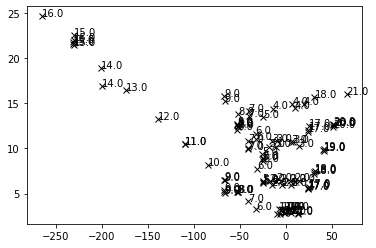

In [34]:
plt.plot(new_tmp.z, new_tmp.r, "kx")
for position in range(len(new_tmp)): 
    row = new_tmp.iloc[position,]
    plt.text(row.z, row.r, s=row.new_layer_ids)

In [35]:
layer_pairs

array([[ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 25],
       [25, 26],
       [26, 27],
       [27, 28],
       [ 0,  5],
       [ 1,  5],
       [ 2,  5],
       [ 3,  5],
       [ 0, 17],
       [ 1, 17],
       [ 2, 17],
       [ 3, 17]])

In [47]:
%%time
def test_hit_position_pixel_endcaps(data):
    """ Tests that all hits are within the z position of the pixel endcaps """

    pixelEndcaps = pd.read_csv('PixelEndcap.csv', index_col = None, header=None).T
    pixelEndcaps.columns= pixelEndcaps.iloc[0,:]
    pixelEndcaps = pixelEndcaps.shift(-1).iloc[0:-1]
    pixelEndcaps = pixelEndcaps.apply(lambda x: x/10 if x.name in ['r', 'z'] else x)
    pixelEndcaps['Disk'] = range(1,13)
    checks_passed = []
    for i in range(1,12):
        # check both positive and negative endcaps, so volume 1 and 3  

        checks_passed.append(min(data[(data['volume_id']== 1) & (data['layer_id'] == i)]['z']) > (-pixelEndcaps['z'][i-1] - 0.8))
        checks_passed.append(max(data[(data['volume_id']== 1) & (data['layer_id'] == i)]['z']) < (-pixelEndcaps['z'][i-1] + 0.8))

        checks_passed.append(min(data[(data['volume_id']== 3) & (data['layer_id'] == i)]['z']) > (pixelEndcaps['z'][i-1] - 0.8))
        checks_passed.append(max(data[(data['volume_id']== 3) & (data['layer_id'] == i)]['z']) < (pixelEndcaps['z'][i-1] + 0.8))

    assert False not in checks_passed, "There are hits in the pixel endcap that are more than 0.8 cm away from the hit layer position"



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [48]:
%%time
test_hit_position_pixel_endcaps(data)

CPU times: user 6.71 s, sys: 303 ms, total: 7.01 s
Wall time: 3.62 s


In [49]:
print(pytest.__version__)

NameError: name 'pytest' is not defined

In [50]:
!pytest --version

pytest 6.1.1


In [57]:
data.pdg_id.unique())

AttributeError: 'numpy.ndarray' object has no attribute 'pdg_id'

In [62]:
def test_pdg_id(data):
    """Checks that all the pdg_ids are within the pdg convention."""

    passed_list = []
    for pid in data.pdg_id.unique():
        try:
            # this throws an error if the pid is not recognised 
            Particle.from_pdgid(pid)
        except:
            passed_list.append(pid)

    assert len(passed_list)==0, "There are particles with ids that are not recognised "+ str(passed_list)


In [63]:
test_pdg_id(data)

AssertionError: There are particles with ids that are not recognised [0]

In [64]:
from particle import Particle

Particle.from_pdgid(0)

InvalidParticle: Input PDGID 0 is invalid!

In [3]:
responses = pd.read_csv('CMS Internal Communications Feedback Form (Responses) - Form responses 1.csv')

In [9]:
new_responses

Timestamp  \
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
1    04/05/2021 14:19:22   
..                   ...   
253  16/05/2021 16:04:01   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   

    1. For how many years have you been a member of the CMS collaboration?  \
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
1                                                  10+                       
..                                                 ...                       
253                                                10+                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       

    2. In which age range do you fall under?  \
0                                      46-55   
0                                      46-55   
0                                      46-55   
0                                      46-55   
1                                      46-55   
..                                       ...   
253                                    56-65   
254                                    46-55   
254                                    46-55   
254                                    46-55   
254                                    46-55   

    3. Are you currently resident (>50%) at CERN?  \
0                                             Yes   
0                                             Yes   
0                                             Yes   
0                                             Yes   
1                                              No   
..                                            ...   
253                                           Yes   
254                                            No   
254                                            No   
254                                            No   
254                                            No   

    4. If you are not resident at CERN, in which country are you based?  \
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
1                                       United Kingdom                    
..                                                 ...                    
253                                                NaN                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    

    5. In which country is your home institute, if different from the country in which you are based?  \
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
1                                                  NaN                                               

In [5]:
# initialise empty data frame
new_responses = pd.DataFrame()

# go through each row of responses
for i in range(len(responses)): 
    #select one row
    row = responses.iloc[i,:]
    # split their work areas into a list of values by splitting on the comma
    work_areas = responses.iloc[i,7].split(",")
    # some of the responses have an extra space, make sure to strip that so ' Ecal' and 'Ecal' are counted as the same
    work_areas = [word.strip() for word in work_areas]
    # create a new temprary data frame that is a copy of the row in question repeated the same amount of times
    # as the length of their work area list 
    tmp = pd.DataFrame([row]*len(work_areas))
    # now change the work area for that data frame into the list of work areas 
    tmp.iloc[:,7] =  work_areas
    # append that data frame 
    new_responses = new_responses.append(tmp)


In [7]:
new_responses.value_counts('9. How often do you read the following webpages? [CERN Document Server (CDS)]')

9. How often do you read the following webpages? [CERN Document Server (CDS)]
Occasionally         259
Often                209
Never                 26
Never heard of it      7
dtype: int64

In [12]:
new_responses.columns

Index(['Timestamp',
       '1. For how many years have you been a member of the CMS collaboration?',
       '2. In which age range do you fall under?',
       '3. Are you currently resident (>50%) at CERN?',
       '4. If you are not resident at CERN, in which country are you based?',
       '5. In which country is your home institute, if different from the country in which you are based?',
       '6. Approximately, what was your percentage of presence at CERN before the COVID-19 pandemic began?',
       '7. Which of the following areas of CMS are you involved in? ',
       '8. If you answered "other" for question 7, please list the area(s) of CMS that you are involved in here.',
       '9. How often do you read the following webpages? [CERN Document Server (CDS)]',
       '9. How often do you read the following webpages? [cms.cern]',
       '9. How often do you read the following webpages? [cmsdoc]',
       '9. How often do you read the following webpages? [cms-info.web.cern.ch]',
   

In [16]:
counts = new_responses.groupby(['9. How often do you read the following webpages? [CERN Document Server (CDS)]', '7. Which of the following areas of CMS are you involved in? ']).agg({'7. Which of the following areas of CMS are you involved in? ':'count'})

In [43]:
new_counts = counts.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

In [47]:
new_counts.index

MultiIndex([(            'Never', 'Extended Executive Board (XEB)'),
            (            'Never',                           'HCAL'),
            (            'Never',                          'HGCAL'),
            (            'Never',                            'MTD'),
            (            'Never', 'Offline Software and Computing'),
            (            'Never',                          'Other'),
            (            'Never',                            'PPD'),
            (            'Never',           'Physics coordination'),
            (            'Never',               'Run coordination'),
            (            'Never',                    'Secretariat'),
            (            'Never',                        'Tracker'),
            (            'Never',           'Trigger coordination'),
            ('Never heard of it',                           'HCAL'),
            ('Never heard of it',                  'Muon detector'),
            ('Never heard of it', 

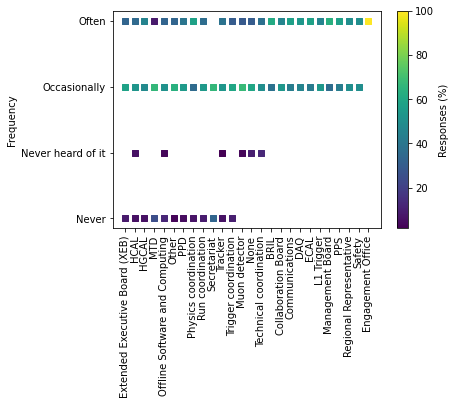

In [45]:
# Make the plot
sc = plt.scatter(new_counts.index.get_level_values(1), new_counts.index.get_level_values(0), c=new_counts.values.flatten(), cmap=plt.cm.viridis, marker="s")

# Cosmetics
#plt.title(title + end)
#plt.xlabel(axis_label)
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

# Colour bar
cbar= plt.colorbar(sc)
cbar.set_label("Responses (%)", labelpad=+5)

In [26]:
import matplotlib.pyplot as plt

In [35]:
counts.droplevel(0).

7. Which of the following areas of CMS are you involved in? 
7. Which of the following areas of CMS are you ...                                                              
Extended Executive Board (XEB)                                                                      1           
HCAL                                                                                                1           
HGCAL                                                                                               2           
MTD                                                                                                 3           
Offline Software and Computing                                                                      7           
...                                                                                               ...           
Run coordination                                                                                    4           
Safety                                                                                              1           
Technical coordination                                                                              3           
Tracker                                                                                            24           
Trigger coordination                                                                                3           

[68 rows x 1 columns]

In [36]:
new_responses

Timestamp  \
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
0    04/05/2021 14:17:37   
1    04/05/2021 14:19:22   
..                   ...   
253  16/05/2021 16:04:01   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   
254  17/05/2021 01:19:35   

    1. For how many years have you been a member of the CMS collaboration?  \
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
0                                                  10+                       
1                                                  10+                       
..                                                 ...                       
253                                                10+                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       
254                                               6-10                       

    2. In which age range do you fall under?  \
0                                      46-55   
0                                      46-55   
0                                      46-55   
0                                      46-55   
1                                      46-55   
..                                       ...   
253                                    56-65   
254                                    46-55   
254                                    46-55   
254                                    46-55   
254                                    46-55   

    3. Are you currently resident (>50%) at CERN?  \
0                                             Yes   
0                                             Yes   
0                                             Yes   
0                                             Yes   
1                                              No   
..                                            ...   
253                                           Yes   
254                                            No   
254                                            No   
254                                            No   
254                                            No   

    4. If you are not resident at CERN, in which country are you based?  \
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
0                                                  NaN                    
1                                       United Kingdom                    
..                                                 ...                    
253                                                NaN                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    
254                                            Hungary                    

    5. In which country is your home institute, if different from the country in which you are based?  \
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
0                                        United States                                                  
1                                                  NaN                                               

In [49]:
new_responses[new_responses['7. Which of the following areas of CMS are you involved in? ']=="Engagement Office"]

Timestamp  \
1    04/05/2021 14:19:22   
32   04/05/2021 14:56:18   
233  12/05/2021 18:01:27   

    1. For how many years have you been a member of the CMS collaboration?  \
1                                                  10+                       
32                                                 10+                       
233                                                10+                       

    2. In which age range do you fall under?  \
1                                      46-55   
32                                     46-55   
233                                    36-45   

    3. Are you currently resident (>50%) at CERN?  \
1                                              No   
32                                             No   
233                                            No   

    4. If you are not resident at CERN, in which country are you based?  \
1                                       United Kingdom                    
32                                             Belgium                    
233                                      United States                    

    5. In which country is your home institute, if different from the country in which you are based?  \
1                                                  NaN                                                  
32                                                 NaN                                                  
233                                                NaN                                                  

    6. Approximately, what was your percentage of presence at CERN before the COVID-19 pandemic began?  \
1                                               11-30%                                                   
32                                              31-50%                                                   
233                                             31-50%                                                   

    7. Which of the following areas of CMS are you involved in?   \
1                                    Engagement Office             
32                                   Engagement Office             
233                                  Engagement Office             

    8. If you answered "other" for question 7, please list the area(s) of CMS that you are involved in here.  \
1                                                  NaN                                                         
32                                                 NaN                                                         
233                                                NaN                                                         

    9. How often do you read the following webpages? [CERN Document Server (CDS)]  \
1                                                Often                              
32                                               Often                              
233                                              Often                              

     ...  \
1    ...   
32   ...   
233  ...   

    18. In general, how satisfied are you with the following aspects of CMS internal communication as a whole? [Amount of information]  \
1                                Somewhat dissatisfied                                                                                   
32                               Somewhat dissatisfied                                                                                   
233                                 Somewhat satisfied                                                                                   

    18. In general, how satisfied are you with the following aspects of CMS internal communication as a whole? [Clarity of information]  \
1                    Neither satified nor dissatisfied                                                                                    
32                   Neither satified nor dissatisfied                                       

In [40]:
counts

7. Which of the following areas of CMS are you involved in? 
9. How often do you read the following webpages... 7. Which of the following areas of CMS are you ...                                                              
Never                                              Extended Executive Board (XEB)                                                                      1           
                                                   HCAL                                                                                                1           
                                                   HGCAL                                                                                               2           
                                                   MTD                                                                                                 3           
                                                   Offline Software and Computing                                                                      7           
...                                                                                                                                                  ...           
Often                                              Run coordination                                                                                    4           
                                                   Safety                                                                                              1           
                                                   Technical coordination                                                                              3           
                                                   Tracker                                                                                            24           
                                                   Trigger coordination                                                                                3           

[68 rows x 1 columns]

In [2]:
s = "ntuple_PU200_event100_to200.h5"

In [8]:
s.split("ntuple_")[1].split('.h5')[0]

'PU200_event100_to200'

In [60]:
t = pd.read_hdf('ntuple_PU200/ntuple_PU200_event15.h5')

In [49]:
t.droplevel(0)

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
subentry                                                                 
0           1    89  8816  140391  140391    2507  -0.381488  2.744790   
1           1    89  8816  140391  140391   83040  -0.839135  5.318910   
2           1    89  8816  140391  140391   83073  -0.855555  5.399750   
3           1    89  8816  140391  140391   81673  -0.872321  5.483649   
4           1    89  8816  140391  140391   87506  -1.154074  6.756645   
...       ...   ...   ...     ...     ...     ...        ...       ...   
140386      1    89  8816  140391  140391  140386  21.950071 -2.340618   
140387      1    89  8816  140391  140391  140387  22.785463 -2.453228   
140388      1    89  8816  140391  140391  140388  23.932882 -2.703574   
140389      1    89  8816  140391  140391  140389  22.112446 -3.077824   
140390      1    89  8816  140391  140391  140390  21.789494 -3.106738   

                   z  particle_id  ...   sim_id  sim_dxy_sig    sim_pt  \
subentry                           ...                                   
0          12.009771          714  ...     3584     0.154046  0.759879   
1          24.400000          714  ...     6891     0.529646  0.759879   
2          24.799999          714  ...     6892     0.120468  0.759879   
3          25.200001          714  ...     6893     1.464735  0.759879   
4          31.375999          714  ...     6894     2.781003  0.759879   
...              ...          ...  ...      ...          ...       ...   
140386    265.200012           -1  ... -1164518     0.000000  0.639812   
140387    265.200012           -1  ...  -715986     0.000000  0.350668   
140388    265.200012           -1  ...  -633995     0.000000  0.317049   
140389    265.200012           -1  ...  -103649     0.000000  0.131305   
140390    265.200012           -1  ...  -118688     0.000000  0.136164   

           sim_eta   sim_phi  volume_id  layer_id  module_id          r  \
subentry                                                                  
0         2.257744  1.689034          2         1          8   2.771174   
1         2.257744  1.689034          3         1          9   5.384696   
2         2.257744  1.689034          3         1         10   5.467109   
3         2.257744  1.689034          3         1          6   5.552598   
4         2.257744  1.689034          3         2          9   6.854498   
...            ...       ...        ...       ...        ...        ...   
140386    2.445618 -0.288287          3        12         48  22.074512   
140387    4.723720 -1.963663          3        12         48  22.917149   
140388    0.752339  2.288061          3        12         48  24.085102   
140389    2.409908  0.903924          3        12         48  22.325619   
140390    2.810808 -1.427552          3        12         48  22.009857   

          new_layer_ids  
subentry                 
0                   1.0  
1                  17.0  
2                  17.0  
3                  17.0  
4                  18.0  
...                 ...  
140386             28.0  
140387             28.0  
140388             28.0  
140389             28.0  
140390             28.0  

[140391 rows x 25 columns]

In [61]:
len(t['sim_id'].unique())

20275

In [63]:
len(t['particle_id'].unique())

201

In [83]:
pd.read_pickle('ntuple100Events.pkl')

run  lumi   evt    nhit   hit_n  \
entry                                    
0        1    37  3603  132275  132275   
1        1    37  3607  134290  134290   
2        1    37  3610  123357  123357   
3        1    37  3605  125667  125667   
4        1    37  3609  135189  135189   
...    ...   ...   ...     ...     ...   
95       1    37  3700  134556  134556   
96       1    37  3696  111799  111799   
97       1    37  3693  154262  154262   
98       1    37  3695  135909  135909   
99       1    37  3690  139956  139956   

                                                  hit_id  \
entry                                                      
0      [6741, 12845, 80818, 80844, 80171, 85092, 5408...   
1      [1196, 8832, 81357, 80630, 80595, 5782, 23362,...   
2      [2464, 22959, 21710, 26867, 27849, 31906, 3685...   
3      [3360, 9693, 18603, 292, 7116, 12494, 16760, 1...   
4      [2042, 9195, 14798, 19371, 5862, 12121, 21388,...   
...                                                  ...   
95     [7129, 25831, 24500, 30094, 31005, 31033, 3629...   
96     [37875, 41785, 46704, 46661, 45626, 49349, 530...   
97     [7320, 91306, 97692, 96085, 102750, 101135, 10...   
98     [3507, 10501, 15851, 20269, 7002, 23681, 28871...   
99     [24424, 24330, 28625, 28532, 34458, 33069, 393...   

                                                       x  \
entry                                                      
0      [2.734923, 5.2952547, 9.777816, 9.957458, 10.3...   
1      [1.4067531, 2.9437318, 5.8627973, 5.993009, 6....   
2      [-2.5890062, -4.9365077, -5.126589, -6.5957856...   
3      [-2.7746372, -6.3735204, -14.335206, 3.2362556...   
4      [-0.48394662, -1.0385469, -1.7993195, -2.55271...   
...                                                  ...   
95     [2.4866462, 6.136576, 6.354931, 8.035896, 8.25...   
96     [-0.413311, -0.5257766, -0.66513866, -0.666171...   
97     [0.73451036, 1.132428, 1.3965462, 1.4129268, 1...   
98     [-2.812813, -6.413337, -10.239612, -14.396061,...   
99     [2.743032, 2.7817159, 3.3645473, 3.3957174, 4....   

                                                       y  \
entry                                                      
0      [-1.8612714, -3.6122391, -6.6968436, -6.820522...   
1      [2.4823341, 5.1667805, 10.191575, 10.412299, 1...   
2      [2.007188, 3.8313417, 3.9793084, 5.1235685, 5....   
3      [0.2700972, 0.620612, 1.3837532, 0.47916475, 0...   
4      [2.7173364, 5.814183, 10.04216, 14.203495, -2....   
...                                                  ...   
95     [-1.3448945, -3.3325105, -3.4526439, -4.376065...   
96     [-3.1289296, -3.98284, -5.0443077, -5.059643, ...   
97     [-2.650198, -4.0894823, -5.047326, -5.109369, ...   
98     [0.1276232, 0.31817466, 0.55265903, 0.8436495,...   
99     [-1.8086964, -1.8359606, -2.220772, -2.2413657...   

                                                       z  \
entry                                                      
0      [8.735739, 14.421146, 24.4, 24.8, 25.6, 31.376...   
1      [11.018553, 15.808966, 24.8, 25.2, 25.6, -12.5...   
2      [-14.952958, -24.8, -25.6, -31.776, -32.176, -...   
3      [4.262564, 3.3086576, 1.1963767, 1.3688829, -1...   
4      [-3.909349, -3.3386924, -2.5477822, -1.7770449...   
...                                                  ...   
95     [-11.046971, -24.4, -25.2, -31.376, -32.176, -...   
96     [-85.778, -109.657, -139.4, -139.8, -140.2, -1...   
97     [15.304484, 25.2, 31.776, 32.176, 40.699, 41.0...   
98     [-1.2464343, 0.72096103, 2.8122673, 5.0867543,...   
99     [-25.2, -25.6, -32.176, -32.576, -40.699, -41....   

                                             particle_id  ...  \
entry                                                     ...   
0      [469, 469, 469, 469, 469, 469, 501, 501, 501, ...  ...   
1      [382, 382, 382, 382, 382, 384, 384, 384, 384, ...  ...   
2      [50, 50, 50, 50, 50, 50, 50, 52, 52, 52, 52, 7...  ...   
3      [103

In [4]:
file2 = uproot3.open("ntuple.root")[b'ntuplizer;1'][b'tree;8']
data2 = file2.pandas.df(["*"], flatten=True)


In [5]:
data2

run  lumi   evt    nhit   hit_n  hit_id          x         y  \
entry subentry                                                                 
0     0           1    37  3603  132275  132275    6741   2.734923 -1.861271   
      1           1    37  3603  132275  132275   12845   5.295255 -3.612239   
      2           1    37  3603  132275  132275   80818   9.777816 -6.696844   
      3           1    37  3603  132275  132275   80844   9.957458 -6.820522   
      4           1    37  3603  132275  132275   80171  10.315056 -7.068929   
...             ...   ...   ...     ...     ...     ...        ...       ...   
99    139951      1    37  3690  139956  139956  139951  22.036810 -2.547982   
      139952      1    37  3690  139956  139956  139952  23.010786 -2.842313   
      139953      1    37  3690  139956  139956  139953  21.208319 -2.789313   
      139954      1    37  3690  139956  139956  139954  24.645046 -3.094739   
      139955      1    37  3690  139956  139956  139955  21.152073 -2.882082   

                         z  particle_id  ...   gen_phi  sim_type  sim_id  \
entry subentry                           ...                               
0     0           8.735739          469  ... -0.596409         0    1704   
      1          14.421146          469  ... -0.596409         0    1705   
      2          24.400000          469  ... -0.596409         0    4405   
      3          24.799999          469  ... -0.596409         0    4406   
      4          25.600000          469  ... -0.596409         0    4407   
...                    ...          ...  ...       ...       ...     ...   
99    139951    265.200012           -1  ...  0.000000         1      -1   
      139952    265.200012           -1  ...  0.000000         1      -1   
      139953    265.200012           -1  ...  0.000000         1      -1   
      139954    265.200012           -1  ...  0.000000         1      -1   
      139955    265.200012           -1  ...  0.000000         1      -1   

                sim_dxy_sig     sim_pt   sim_eta   sim_phi  volume_id  \
entry subentry                                                          
0     0            1.419558  15.816891  1.366168 -0.596409          2   
      1            5.156816  15.816891  1.366168 -0.596409          2   
      2            0.053190  15.816891  1.366168 -0.596409          3   
      3            0.242483  15.816891  1.366168 -0.596409          3   
      4           16.304440  15.816891  1.366168 -0.596409          3   
...                     ...        ...       ...       ...        ...   
99    139951       0.000000   0.179903  2.775005 -0.989638          3   
      139952       0.000000   0.176872  2.645725  0.467731          3   
      139953       0.000000   0.233792  3.000685  0.362460          3   
      139954       0.000000   0.251116  1.487157 -2.009509          3   
      139955       0.000000   0.133629  2.501078 -0.265022          3   

                layer_id  module_id  
entry subentry                       
0     0                1          7  
      1                2          8  
      2                1         29  
      3                1         30  
      4                1         22  
...                  ...        ...  
99    139951          12         48  
      139952          12         48  
      139953          12         48  
      139954          12         48  
      139955          12         48  

[13572908 rows x 23 columns]

In [6]:
data2.columns

Index(['run', 'lumi', 'evt', 'nhit', 'hit_n', 'hit_id', 'x', 'y', 'z',
       'particle_id', 'pdg_id', 'gen_pt', 'gen_eta', 'gen_phi', 'sim_type',
       'sim_id', 'sim_dxy_sig', 'sim_pt', 'sim_eta', 'sim_phi', 'volume_id',
       'layer_id', 'module_id'],
      dtype='object')

In [11]:
data2.iloc[0:20]['particle_id']

entry  subentry
0      0           469
       1           469
       2           469
       3           469
       4           469
       5           469
       6           501
       7           501
       8           501
       9           501
       10          507
       11          507
       12          507
       13          508
       14          508
       15          508
       16          508
       17          509
       18          509
       19          509
Name: particle_id, dtype: int32